<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:12px;"><i>by <a href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=71605" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/03_CNN_Autoencoder.ipynb"  target="_blank"
          download="03_CNN_Autoencoder">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{III}$. Convolutional Neural Networks and Autoencoders (using Keras)

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 3

This notebook shows how to:
- implement a neural network using the Tensorflow/Keras module
- recognize/classify images with dense nets (supervised learning)
- recognize/classify images with convolutional nets (supervised learning)
- implement image denoising using pseudo-autoencoders (almost unsupervised learning)
- generate images: U-net, GAN, cGAN and VAE (unsupervised learning)
- anomaly detection with a 1D Autoencoder (unsupervised learning)
- understand train, validation and test datasets
- implement callbacks, like an automatic early stopper
- make data augmentation

**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.<br>
[2] [Keras](https://keras.io/getting_started/): a deep learning API written in Python.<br>
[3] [Tensorflow](https://www.tensorflow.org/api_docs/python/tf): an open source machine learning platform.<br>
[4] [Using neural nets to recognize handwritten digits](http://neuralnetworksanddeeplearning.com/chap1.html).<br>
[5] [pix2pix](https://www.tensorflow.org/tutorials/generative/pix2pix): Image-to-image translation with a conditional GAN.<br>
[6] VAE example on [Towards data science](https://towardsdatascience.com/variational-autoencoders-as-generative-models-with-keras-e0c79415a7eb).<br>
[7] https://github.com/kartikgill/Autoencoders.<br>
[8] https://github.com/dhanushkamath/VariationalAutoencoder. <br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Imports:-Basics-and-tensorflow" data-toc-modified-id="0.-Imports:-Basics-and-tensorflow-0">0. Imports: Basics and tensorflow</a></span></li><li><span><a href="#1.-Import-data" data-toc-modified-id="1.-Import-data-1">1. Import data</a></span><ul class="toc-item"><li><span><a href="#1.1-Check-data" data-toc-modified-id="1.1-Check-data-1.1">1.1 Check data</a></span></li></ul></li><li><span><a href="#2.-Image-recognition-with-a-perceptron-NN-(Introduction-to-Keras)" data-toc-modified-id="2.-Image-recognition-with-a-perceptron-NN-(Introduction-to-Keras)-2">2. Image recognition with a perceptron NN (Introduction to Keras)</a></span><ul class="toc-item"><li><span><a href="#2.1-Results-evaluation-after-1-epoch" data-toc-modified-id="2.1-Results-evaluation-after-1-epoch-2.1">2.1 Results evaluation after 1 epoch</a></span></li><li><span><a href="#2.2-Train-for-several-epochs" data-toc-modified-id="2.2-Train-for-several-epochs-2.2">2.2 Train for several epochs</a></span></li></ul></li><li><span><a href="#3.-Image-recognition-with-a-CNN" data-toc-modified-id="3.-Image-recognition-with-a-CNN-3">3. Image recognition with a CNN</a></span><ul class="toc-item"><li><span><a href="#3.1-[EXERCISE]:-Play-with-the-'shape'-of-the-model-(number-of-layers-and-number-of-neurons-each)-and-try-to-improve-the-accuracy." data-toc-modified-id="3.1-[EXERCISE]:-Play-with-the-'shape'-of-the-model-(number-of-layers-and-number-of-neurons-each)-and-try-to-improve-the-accuracy.-3.1">3.1 [EXERCISE]: Play with the 'shape' of the model (number of layers and number of neurons each) and try to improve the accuracy.</a></span></li></ul></li><li><span><a href="#4.-Image-Denoiser-(pseudo-unsupervised-learning)" data-toc-modified-id="4.-Image-Denoiser-(pseudo-unsupervised-learning)-4">4. Image Denoiser (pseudo-unsupervised learning)</a></span></li><li><span><a href="#5.-Generative-Adversarial-Neural-Networks-(pix2pix)" data-toc-modified-id="5.-Generative-Adversarial-Neural-Networks-(pix2pix)-5">5. Generative Adversarial Neural Networks (pix2pix)</a></span><ul class="toc-item"><li><span><a href="#5.1-[EXERCISE]-Apply-the-pix2pix-algorithm-to-a-certain-set-of-pair-images.-$\rightarrow$-use-the-maps-dataset!!" data-toc-modified-id="5.1-[EXERCISE]-Apply-the-pix2pix-algorithm-to-a-certain-set-of-pair-images.-$\rightarrow$-use-the-maps-dataset!!-5.1">5.1 [EXERCISE] Apply the pix2pix algorithm to a certain set of pair images. $\rightarrow$ use the <code>maps</code> dataset!!</a></span></li></ul></li><li><span><a href="#6.-Autoencoder-for-dimension-reduction-(unsupervised-training)" data-toc-modified-id="6.-Autoencoder-for-dimension-reduction-(unsupervised-training)-6">6. Autoencoder for dimension reduction (unsupervised training)</a></span></li><li><span><a href="#7.-Autoencoders-for-random-face-generator" data-toc-modified-id="7.-Autoencoders-for-random-face-generator-7">7. Autoencoders for random face generator</a></span></li><li><span><a href="#8.-Timeseries-anomaly-detection-using-an-Autoencoder" data-toc-modified-id="8.-Timeseries-anomaly-detection-using-an-Autoencoder-8">8. Timeseries anomaly detection using an Autoencoder</a></span><ul class="toc-item"><li><span><a href="#8.1-Load-the-data" data-toc-modified-id="8.1-Load-the-data-8.1">8.1 Load the data</a></span><ul class="toc-item"><li><span><a href="#8.1.1-Timeseries-data-without-anomalies" data-toc-modified-id="8.1.1-Timeseries-data-without-anomalies-8.1.1">8.1.1 Timeseries data without anomalies</a></span></li><li><span><a href="#8.1.2-Timeseries-data-with-anomalies" data-toc-modified-id="8.1.2-Timeseries-data-with-anomalies-8.1.2">8.1.2 Timeseries data with anomalies</a></span></li></ul></li><li><span><a href="#8.2-Prepare-training-data" data-toc-modified-id="8.2-Prepare-training-data-8.2">8.2 Prepare training data</a></span></li><li><span><a href="#8.3-Build-a-model" data-toc-modified-id="8.3-Build-a-model-8.3">8.3 Build a model</a></span></li><li><span><a href="#8.4-Train-the-model" data-toc-modified-id="8.4-Train-the-model-8.4">8.4 Train the model</a></span></li><li><span><a href="#8.5-Detecting-anomalies" data-toc-modified-id="8.5-Detecting-anomalies-8.5">8.5 Detecting anomalies</a></span><ul class="toc-item"><li><span><a href="#8.5.1-Compare-recontruction" data-toc-modified-id="8.5.1-Compare-recontruction-8.5.1">8.5.1 Compare recontruction</a></span></li><li><span><a href="#8.5.2-Prepare-test-data" data-toc-modified-id="8.5.2-Prepare-test-data-8.5.2">8.5.2 Prepare test data</a></span></li></ul></li><li><span><a href="#8.6-Plot-anomalies" data-toc-modified-id="8.6-Plot-anomalies-8.6">8.6 Plot anomalies</a></span></li></ul></li></ul></div>

## 0. Imports: Basics and tensorflow

`!pip install numpy==1.21`  # it should not be needed. Use it if "'numpy' has no attribute 'typeDict'" error

`!pip install -U tensorflow`

`!pip install pandas`

In [1]:
import tensorflow as tf

from tensorflow.keras import Sequential # Sequential is the neural-network class
from tensorflow.keras import Model
from tensorflow.keras.layers import Input  # Let's see how to use it
from tensorflow.keras.layers import Dense, GaussianDropout  # Fully connected
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D  # for CNN
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape  # For Autoencoders
from tensorflow.keras import optimizers  # to choose more advanced optimizers like 'adam'
from tensorflow.keras.datasets import mnist  # dataset of handwritten numbers

import numpy as np
import random

import pandas as pd

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for subplots within subplots:
from matplotlib import gridspec

# for nice inset colorbars: (approach changed from lecture 1 'Visualization' notebook)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import time, sleep

# Set up a random number generator with a fixed seed, so that
# running this whole notebook repeatedly should always give
# the same result (useful for debugging)
rng = np.random.RandomState(23455)

## 1. Import data

The loader for the MNIST image data was taken from Nielsen's online book,

http://neuralnetworksanddeeplearning.com/chap1.html

In [11]:
"""
mnist_loader
~~~~~~~~~~~~

taken from Nielsen's online book:
http://neuralnetworksanddeeplearning.com/chap1.html


A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

def load_data():
    """ Return three datasets (train/val/test), each one being a tuple of
         - numpy array of setSize x 28 x 28 x 1: Set of images
         - numpy array of setSize x 1: Set of ground truth values
        setSize is 50000 for the train set and 10000 for the val and test sets.
    """
    
    # get raw data: a tuple of two entries (train/test) each one 
    #  being also a tuple of two entries, one for a set of 28x28 images
    #  and the other being a set of their corresponding integers
    (train_val_X, train_val_y), (test_X, test_y) = mnist.load_data()

    # to convert values from 0 to 255 into range 0. to 1.
    train_val_X = train_val_X.astype('float32') / 255.
    test_X = test_X.astype('float32') / 255.
    
    # adapt this if using `channels_first` image data format
    train_val_X = np.reshape(train_val_X, (len(train_val_X), 28, 28, 1)) 
    test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))
    
    train_X = train_val_X[:-10000]
    val_X = train_val_X[-10000:]

    train_y = train_val_y[:-10000]
    val_y = train_val_y[-10000:]
    
    return (train_X, train_y), (val_X, val_y), (test_X, test_y)


def flatten(dataset):
    """ Takes a dataset and the image in it is flatten
        The dataset is expected to be a tuple of two entries,
        where the images are found in the first as a np array.
    """
    image_set = dataset[0]
    set_size = image_set.shape[0]
    num_pixels = image_set.shape[1] * image_set.shape[2]
    flattened_set = np.zeros([set_size, num_pixels])

    for idx, item in enumerate(image_set):
        flattened_set[idx, :] = image_set[idx].flatten()
    
    return flattened_set, dataset[1]


def load_data_wrapper():
    """ Return ``training_data``, ``validation_data`` and ``test_data``.
           
        Based on ``load_data``, but the ground truth value is encoded
        as one hot vector.

        In particular, ``train_data`` is a list containing 50,000
        2-tuples ``(x, y)``:
          ``x`` is a 784-dimensional numpy.ndarray containing the input image. 
          ``y`` is a 10-dimensional numpy.ndarray representing the unit vector 
                corresponding to the correct digit for ``x``.

        The ``val_data`` and ``test_data`` are similar, except
        each contains only 10,000 images.

        Obviously, this means we're using slightly different formats for
        the training data and the validation / test data.  These formats
        turn out to be the most convenient for use in our neural network
        code.
    """
    
    train_d, val_d, test_d = load_data()
    
    training_data = flatten(train_d)
    validation_data = flatten(val_d)
    test_data = flatten(test_d)
    
    training_data = vectorize_targets(training_data)
    validation_data = vectorize_targets(validation_data)
    test_data = vectorize_targets(test_data)

    return (training_data, validation_data, test_data)

def vectorize_targets(dataset):
    """ Takes a dataset and vectorize the targets (second entry of the tuple)
        according to the ONE HOT encoder.
    """
    num_samples = len(dataset[1])
    targets = np.zeros([num_samples, 10])
    for j in range(num_samples):
        targets[j,:] = vectorized_result(dataset[1][j])
        
    return dataset[0], targets

def vectorized_result(num):
    """ Return a 10-dimensional unit vector with a 1.0 in the jth
        position and zeroes elsewhere.  This is used to convert a digit
        (0...9) into a corresponding desired output from the neural
        network.  ONE HOT ENCODER
    """
    e = np.zeros((10))
    e[num] = 1.0
    return e

In [12]:
((training_inputs, training_results),
 (validation_inputs, validation_results),
 (test_inputs, test_results)) = load_data_wrapper()

num_samples = len(training_results)
numpixels = training_inputs.shape[1]
image_size = int(np.sqrt(numpixels))
num_test_samples = len(test_results)

print("num_samples:", num_samples)
print("numpixels:", numpixels, f"({image_size}x{image_size})")
print("num_test_samples:", num_test_samples)

num_samples: 50000
numpixels: 784 (28x28)
num_test_samples: 10000


### 1.1 Check data

In [13]:
def unflatten(flat_image, im_size=image_size):
    return np.reshape(flat_image, [image_size, image_size])

training_inputs.shape: (50000, 784)


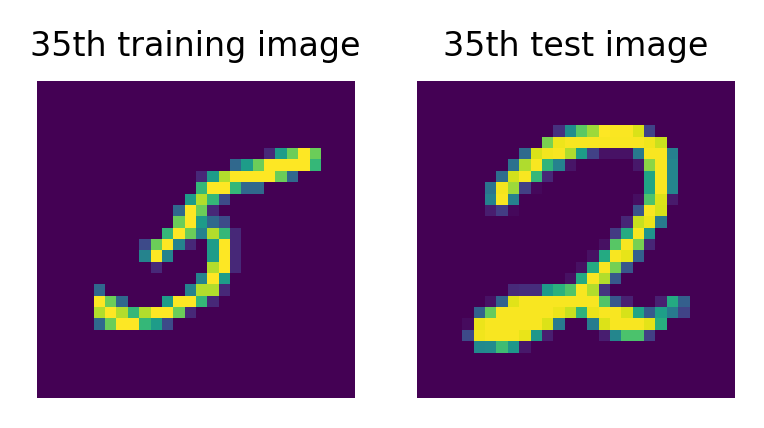

In [14]:
print("training_inputs.shape:", training_inputs.shape)
# psi=training_inputs - np.sum(training_inputs,axis=0) / num_samples

idx_example = 35
fig, axs = plt.subplots(1, 2, figsize=(3, 3))
axs[0].imshow(unflatten(training_inputs[idx_example,:]))
axs[0].set_title(f"{idx_example}th training image", fontsize=8)
axs[0].axis('off')
axs[1].imshow(unflatten(test_inputs[idx_example,:]))
axs[1].set_title(f"{idx_example}th test image", fontsize=8)
axs[1].axis('off');

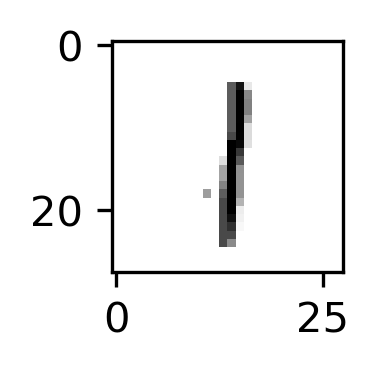

One hot vector for true label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
def display_image(which):
    plt.figure(figsize=(1,1))
    plt.imshow(unflatten(test_inputs[which,:]),
               interpolation='nearest', cmap='binary')
    plt.show()
    print("One hot vector for true label:", test_results[which])
    
display_image(np.random.randint(10000))

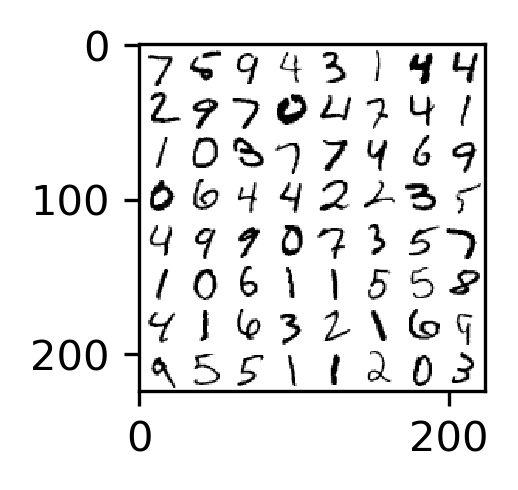

In [16]:
def display_image_array(rng=(8,8)):
    numcolumns = rng[0]
    BigImage = np.zeros([image_size*numcolumns, image_size*numcolumns])
    
    for j in range(rng[0]*rng[1]):
        x = (j % numcolumns) * image_size
        y = (j// numcolumns) * image_size
        BigImage[x:x+image_size, 
                 y:y+image_size] = unflatten(test_inputs[j,:])
        
    plt.imshow(BigImage, interpolation='nearest', cmap='binary')
    plt.show()
    
plt.figure(figsize=(1.5,1.5))
display_image_array((8,8))

## 2. Image recognition with a perceptron NN (Introduction to Keras)

Let's define a couple of perceptron networks (fully connected or dense neural network) with different shape (number of layers and layers size) by using [`tensorflow.keras.Sequencial`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class and its methods [`add()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#add) and [`compile()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile). Check also classes [`tensorflow.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) and [`tensorflow.keras.optimizers.SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD). Moreover, there is info about cross-entropy losses functions [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/).

In [17]:
# initialize a quite basic perceptron network
def dense_net():
    net = Sequential()
    
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(30, input_shape=(numpixels,), activation='relu'))
    # net.add(Dense(20, activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.SGD(learning_rate=1.0), 
                metrics=['categorical_accuracy'])
    
    return net

In [18]:
net = dense_net()
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [19]:
training_inputs.shape

(50000, 784)

Elapsed time: 4.25 s (0.0085 s/step)


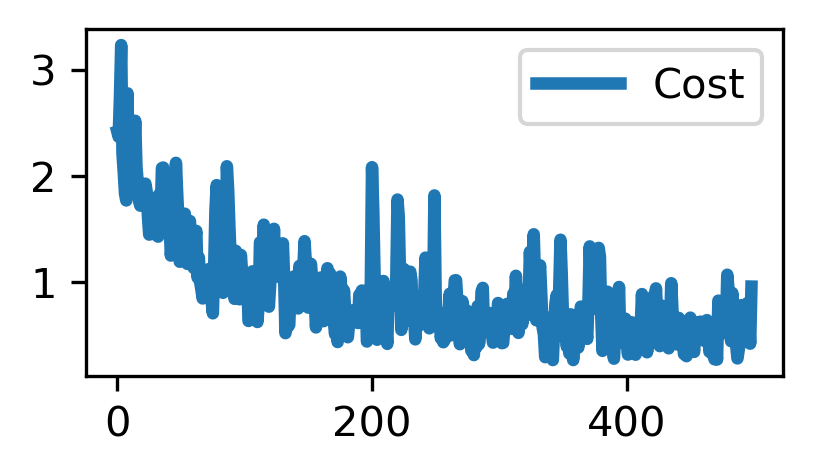

In [20]:
batchsize = 100
batches = num_samples // batchsize - 1
costs = np.zeros(batches)

t0 = time()
for j in range(batches):
    costs[j] = net.train_on_batch(training_inputs[j*batchsize:(j+1)*batchsize,:], 
                                  training_results[j*batchsize:(j+1)*batchsize,:])[0]
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/step)" % (t_done, t_done/batches))
plt.figure(figsize=(3, 1.5))
plt.plot(costs,linewidth=3)
plt.legend(['Cost'])
plt.show()

### 2.1 Results evaluation after 1 epoch

Let's check the network performance by doing some predictions and comparing them to the ground truth

Predict. Prob.: 
	0.0 , 0.0 , 0.0 , 0.7 , 0.0 , 0.0 , 0.0 , 0.3 , 0.0 , 0.0
	0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
	0.0 , 0.9 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
	   ...
	0.0 , 0.0 , 0.0 , 0.0 , 0.8 , 0.1 , 0.0 , 0.0 , 0.1 , 0.0
	0.0 , 0.0 , 0.0 , 0.3 , 0.1 , 0.3 , 0.0 , 0.1 , 0.2 , 0.0
	0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0
( vals:  0     1     2     3     4     5     6     7     8     9    )
Predictions: [3 3 1 ... 4 5 6]
True labels: [7 2 1 ... 4 5 6]
Wrong predictions:  29.659999999999997 %


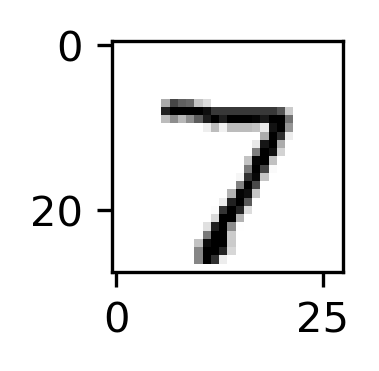

One hot vector for true label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
True:  7  - Predicted:  3
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.7 , 0.0 , 0.0 , 0.0 , 0.3 , 0.0 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


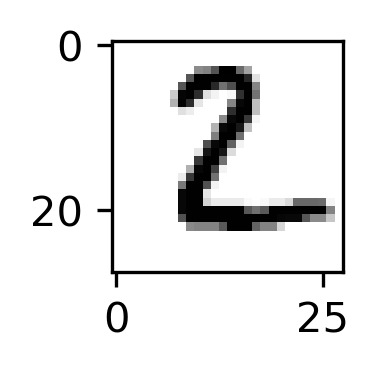

One hot vector for true label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
True:  2  - Predicted:  3
Predict. Prob.: 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


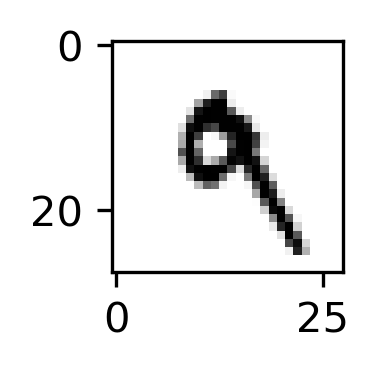

One hot vector for true label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
True:  9  - Predicted:  4
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.0 , 0.4 , 0.0 , 0.0 , 0.3 , 0.0 , 0.3
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


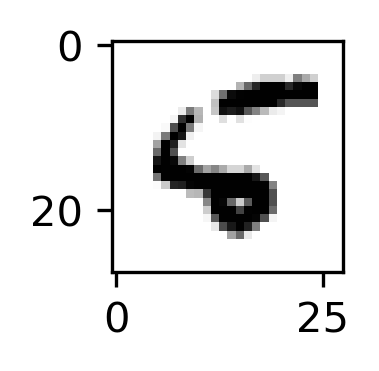

One hot vector for true label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
True:  5  - Predicted:  4
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.0 , 0.7 , 0.1 , 0.1 , 0.0 , 0.1 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


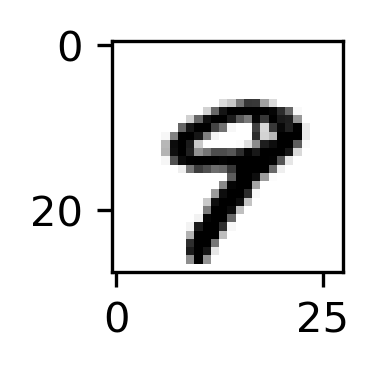

One hot vector for true label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
True:  9  - Predicted:  7
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


In [21]:
def test_on(do_print=True, is_cnn=False):
#     global test_inputs, test_results
    global predictions_probs, predictions, true_labels
    
    if is_cnn:
        inputs = np.reshape(test_inputs, 
                            [num_test_samples, image_size, image_size])
    else:
        inputs = test_inputs
        
    
    predictions_probs = net.predict_on_batch(inputs)
    predictions = np.argmax(predictions_probs, axis=1)
    true_labels = np.argmax(test_results, axis=1)
    
    print_probs(predictions_probs)
    print("Predictions:", predictions)
    print("True labels:", true_labels)
    
    which=np.where(true_labels!=predictions)[0]
    print("Wrong predictions: ", len(which)/num_test_samples*100, "%")
    
    for count, j in enumerate(which):
        if count < 5:  # Show no more 20 images
            display_image(j)
            print("True: ", true_labels[j], " - Predicted: ", predictions[j]) 
#             print("\nWith prob.: ", prob2str(predictions_probs[j,:]))
            print_probs(predictions_probs[j,:])
    return which

def print_probs(prob_array, numels=3):
    prob2str = lambda ps: ' , '.join(f"{p:.1f}" for p in ps)
    
    if len(prob_array.shape) > 1:
        probs_str0 = '\n\t'.join(prob2str(ps) for ps in predictions_probs[:numels])
        probs_strL = '\n\t'.join(prob2str(ps) for ps in predictions_probs[-numels:])
        probs_str = f"\n\t{probs_str0}\n\t   ...\n\t{probs_strL}"
        suf = ''
    else:
        probs_str = prob2str(prob_array)
        suf = ' '*8
    
    print("Predict. Prob.:", probs_str)
    print(suf+'( vals: '+''.join(f" {v}    " for v in range(10))+')')
            
wrongs = test_on()

### 2.2 Train for several epochs

In [22]:
# use the keras "fit" function to go through the whole data set many times 
#  ('epochs'), and even set aside some validation samples
epochs = 30
t0 = time()
history=net.fit(training_inputs, training_results, batch_size=100, epochs=epochs, 
                validation_data=(validation_inputs, validation_results))
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/epoch)" % (t_done, t_done/epochs))

Epoch 1/30
500/500 [==============================] - 1s 2ms/step - loss: 0.7817 - categorical_accuracy: 0.7721 - val_loss: 1.0786 - val_categorical_accuracy: 0.7031
Epoch 2/30
500/500 [==============================] - 1s 1ms/step - loss: 0.7343 - categorical_accuracy: 0.7917 - val_loss: 0.4032 - val_categorical_accuracy: 0.8946
Epoch 3/30
500/500 [==============================] - 1s 1ms/step - loss: 0.4868 - categorical_accuracy: 0.8616 - val_loss: 0.3573 - val_categorical_accuracy: 0.9013
Epoch 4/30
500/500 [==============================] - 1s 1ms/step - loss: 0.4440 - categorical_accuracy: 0.8740 - val_loss: 0.5895 - val_categorical_accuracy: 0.8411
Epoch 5/30
500/500 [==============================] - 1s 1ms/step - loss: 0.4200 - categorical_accuracy: 0.8810 - val_loss: 0.3798 - val_categorical_accuracy: 0.8936
Epoch 6/30
500/500 [==============================] - 1s 2ms/step - loss: 0.3989 - categorical_accuracy: 0.8881 - val_loss: 0.3114 - val_categorical_accuracy: 0.9172
Epoc

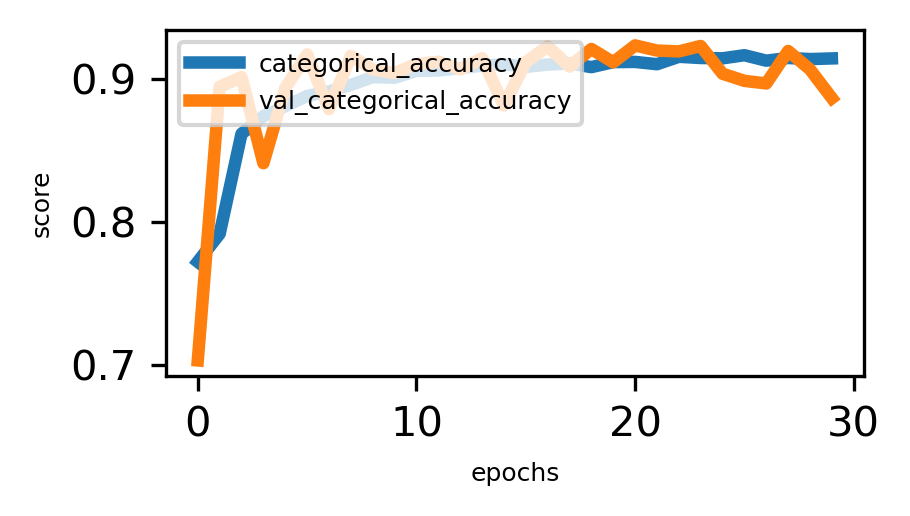

In [23]:
def plot_histories(history_dict, categories=('categorical_accuracy', 'val_categorical_accuracy')):
    fig=plt.figure(figsize=(3,1.5))
    for curve in categories:
        plt.plot(history_dict[curve], linewidth=3, label=curve)

    plt.legend(fontsize=6, loc='upper left')
    plt.xlabel('epochs', fontsize=6)
    plt.ylabel('score', fontsize=6)

plot_histories(history.history)

Predict. Prob.: 
	0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0
	0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
	0.0 , 0.8 , 0.2 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
	   ...
	0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
	0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0 , 0.0
	0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0
( vals:  0     1     2     3     4     5     6     7     8     9    )
Predictions: [7 2 1 ... 4 5 6]
True labels: [7 2 1 ... 4 5 6]
Wrong predictions:  10.73 %


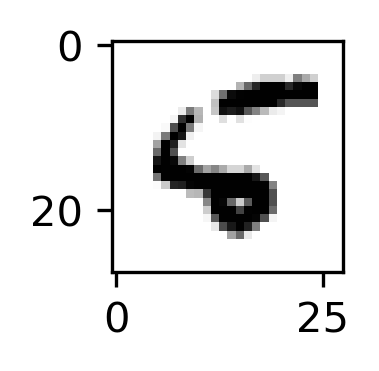

One hot vector for true label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
True:  5  - Predicted:  6
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


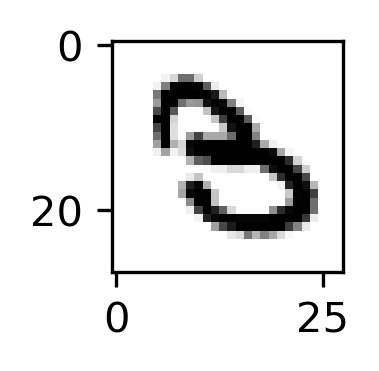

One hot vector for true label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
True:  3  - Predicted:  8
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.1 , 0.1 , 0.1 , 0.0 , 0.0 , 0.7 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


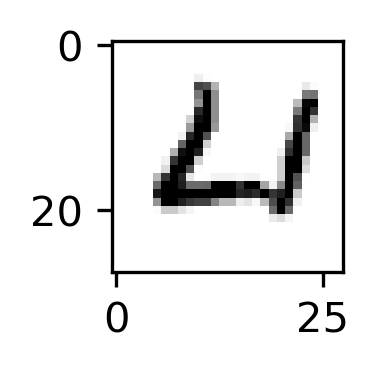

One hot vector for true label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
True:  4  - Predicted:  6
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


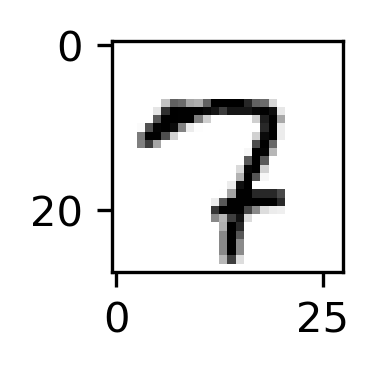

One hot vector for true label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
True:  7  - Predicted:  3
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.7 , 0.0 , 0.0 , 0.0 , 0.3 , 0.0 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


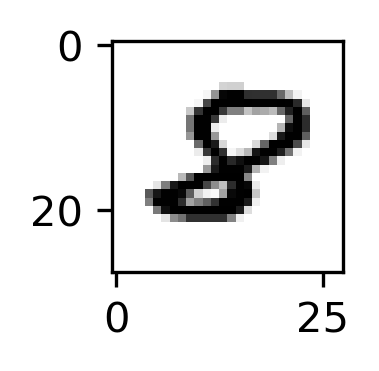

One hot vector for true label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
True:  8  - Predicted:  2
Predict. Prob.: 0.0 , 0.0 , 0.7 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.3 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


In [24]:
# see which fraction of the test samples is classified incorrectly
wrongs = test_on()

## 3. Image recognition with a CNN

Let's do the same with a Convolutional Neural Network

![https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg](https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg)
![https://docs.ecognition.com/Resources/Images/ECogUsr/UG_CNN_scheme.png](https://docs.ecognition.com/Resources/Images/ECogUsr/UG_CNN_scheme.png)

In [25]:
# initialize the network
def cnn_net():
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Conv2D(input_shape=(image_size, image_size,1), filters=6, 
                   kernel_size=[5,5], activation='relu', padding='same'))
    net.add(AveragePooling2D(pool_size=4))
    net.add(Flatten())
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.Adam(learning_rate=0.1), 
                metrics=['categorical_accuracy'])
    
    return net

In [26]:
net = cnn_net()
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 7, 7, 6)          0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 294)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2950      
                                                                 
Total params: 3,106
Trainable params: 3,106
Non-trainable params: 0
_________________________________________________________________


In [27]:
train_data, _, _ = load_data()
train_data = vectorize_targets(train_data)

epochs = 3
t0 = time()
history=net.fit(train_data[0], train_data[1], batch_size=100,
                epochs=epochs, validation_split=0.1)
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/epoch)" % (t_done, t_done/epochs))

Epoch 1/3
450/450 [==============================] - 5s 10ms/step - loss: 0.2619 - categorical_accuracy: 0.9198 - val_loss: 0.2201 - val_categorical_accuracy: 0.9286
Epoch 2/3
450/450 [==============================] - 4s 10ms/step - loss: 0.1675 - categorical_accuracy: 0.9489 - val_loss: 0.1713 - val_categorical_accuracy: 0.9464
Epoch 3/3
450/450 [==============================] - 5s 11ms/step - loss: 0.1717 - categorical_accuracy: 0.9470 - val_loss: 0.2134 - val_categorical_accuracy: 0.9328
Elapsed time: 14.16 s (4.7208 s/epoch)


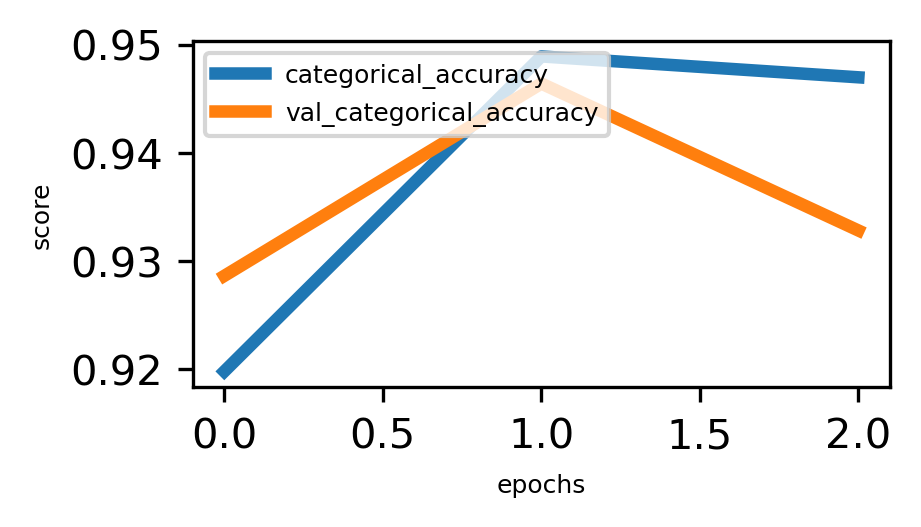

In [28]:
plot_histories(history.history)

Predict. Prob.: 
	0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0
	0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
	0.0 , 1.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
	   ...
	0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
	0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.5 , 0.0 , 0.0 , 0.5 , 0.0
	0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 0.0 , 0.0
( vals:  0     1     2     3     4     5     6     7     8     9    )
Predictions: [7 2 1 ... 4 5 6]
True labels: [7 2 1 ... 4 5 6]
Wrong predictions:  5.220000000000001 %


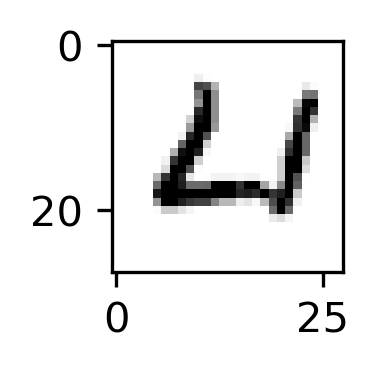

One hot vector for true label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
True:  4  - Predicted:  0
Predict. Prob.: 0.9 , 0.0 , 0.0 , 0.0 , 0.1 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


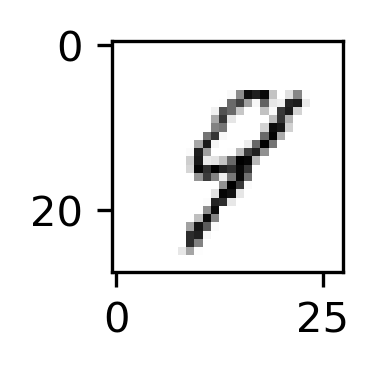

One hot vector for true label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
True:  9  - Predicted:  4
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.0 , 0.7 , 0.0 , 0.0 , 0.0 , 0.0 , 0.3
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


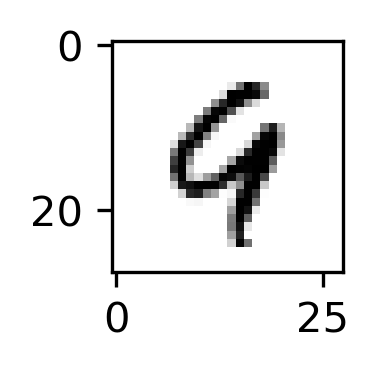

One hot vector for true label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
True:  9  - Predicted:  4
Predict. Prob.: 0.0 , 0.0 , 0.0 , 0.0 , 0.6 , 0.0 , 0.0 , 0.0 , 0.0 , 0.4
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


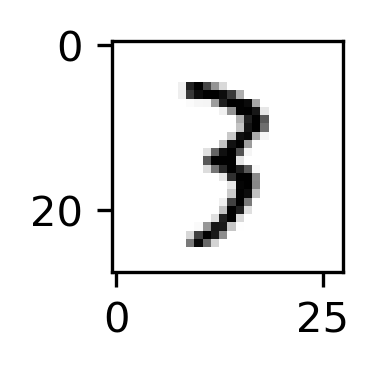

One hot vector for true label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
True:  3  - Predicted:  1
Predict. Prob.: 0.0 , 0.5 , 0.0 , 0.3 , 0.0 , 0.0 , 0.0 , 0.2 , 0.0 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


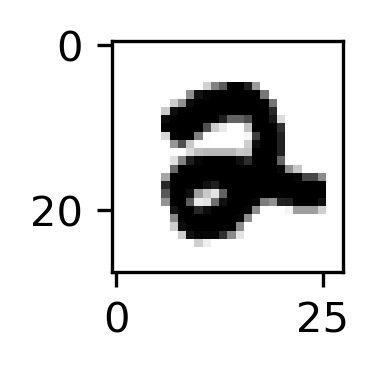

One hot vector for true label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
True:  2  - Predicted:  0
Predict. Prob.: 0.7 , 0.0 , 0.1 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.2 , 0.0
        ( vals:  0     1     2     3     4     5     6     7     8     9    )


In [29]:
# see which fraction of the test samples is classified incorrectly
wrongs = test_on(is_cnn=True)

In [ ]:
### 3.1 [EXERCISE]: Play with the 'shape' of the model (number of layers and number of neurons each) and try to improve the accuracy.

## 4. Image Denoiser (pseudo-unsupervised learning)

*Code based on [this Keras example](https://keras.io/examples/vision/autoencoder/)*.

In [30]:
tr_imgs, vl_imgs, te_imgs = load_data()

train_X = tr_imgs[0]
val_X = vl_imgs[0]
test_X = te_imgs[0]

noise_factor = 0.5
# random values as noise source
train_X_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)  
val_X_noisy = val_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=val_X.shape) 
test_X_noisy = test_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_X.shape) 

# to make values in the range of 0 to 1: values<0 -> 0 while values>1 -> 1.
train_X_noisy = np.clip(train_X_noisy, 0., 1.)   
val_X_noisy = np.clip(val_X_noisy, 0., 1.)
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

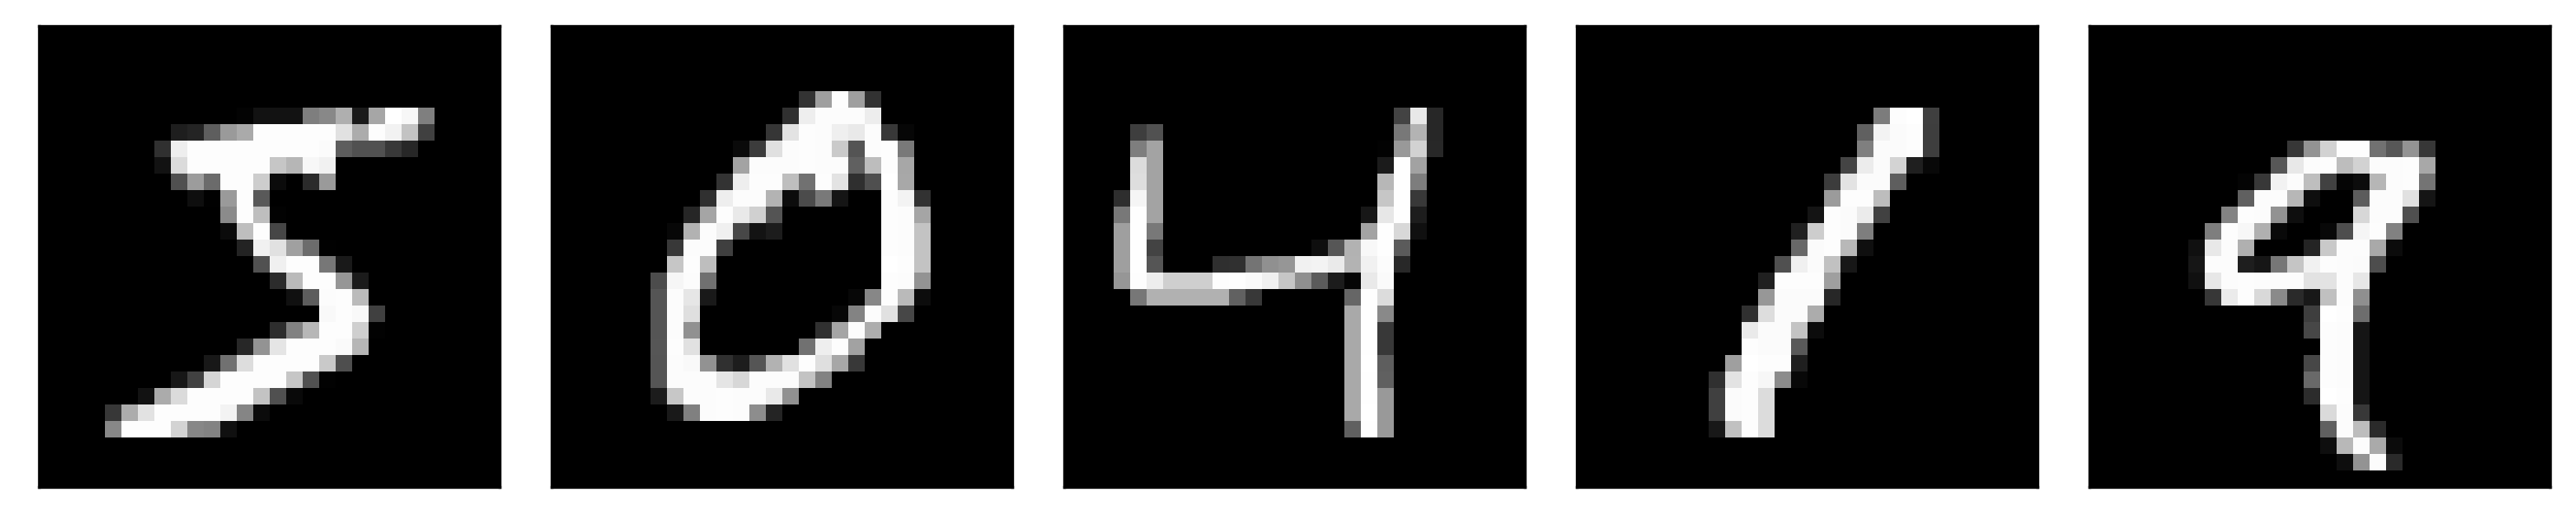

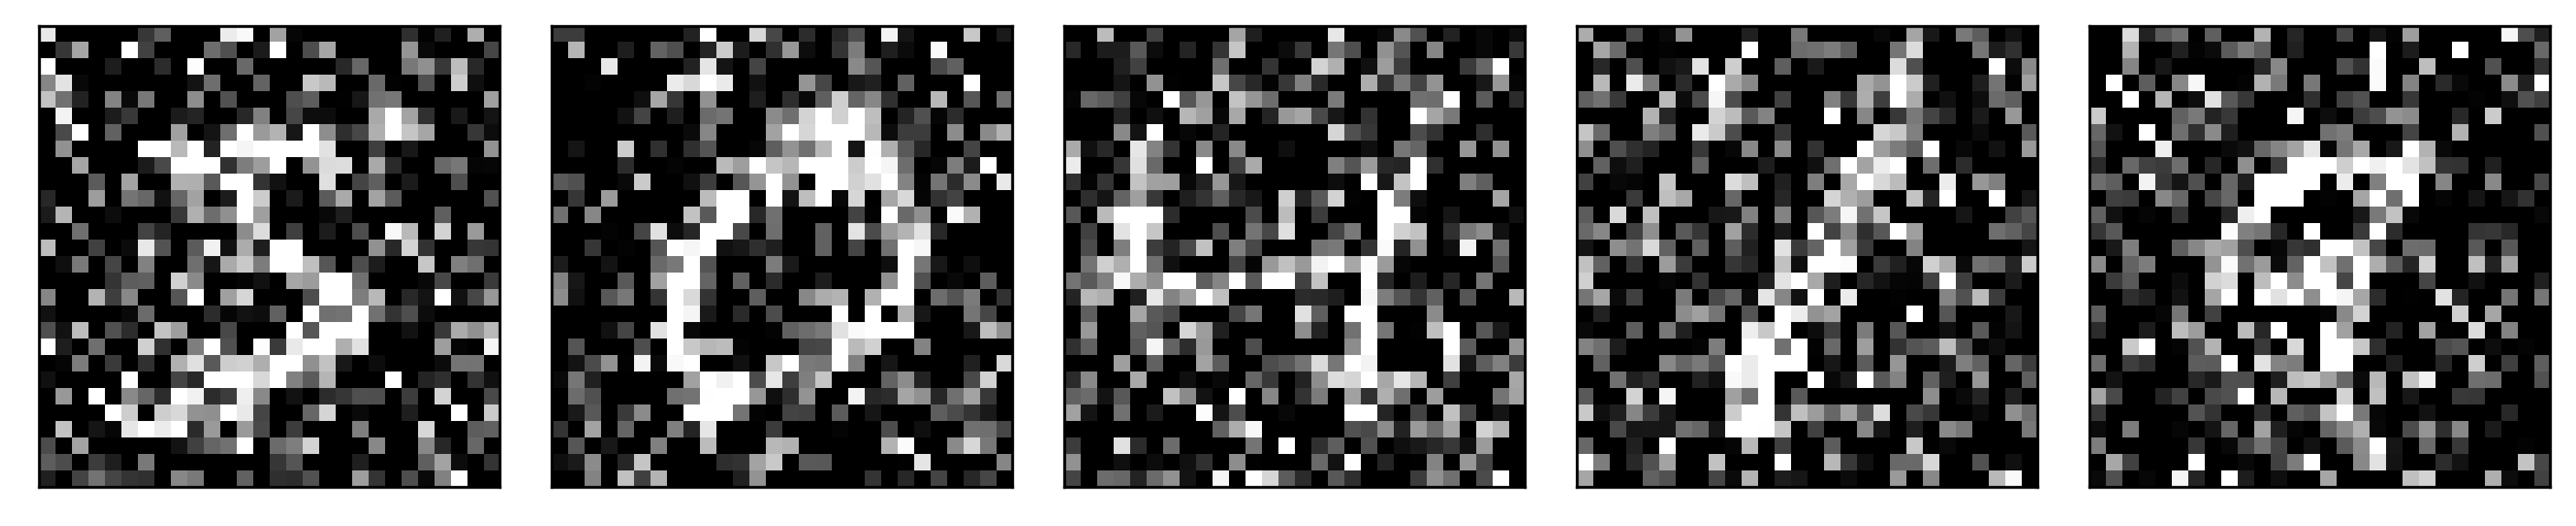

In [31]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(unflatten(train_X[i]), cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(unflatten(train_X_noisy[i]), cmap='gray')
plt.tight_layout()
plt.show()

In [32]:
Input_img = Input(shape=(28, 28, 1))  

x1 = Conv2D(4, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(8, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
encoded = MaxPool2D( (2, 2), padding='same')(x3)

# decoding architecture
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
x2 = UpSampling2D((2, 2))(x2)
x1 = Conv2D(4, (3, 3), activation='relu')(x2)
x1 = UpSampling2D((2, 2))(x1)
decoded = Conv2D(1, (3, 3), padding='same')(x1)


autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 4)         40        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 8)         296       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 16)          1168

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3, 
                              verbose=1, mode='auto')

a_e = autoencoder.fit(train_X_noisy, train_X,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X_noisy, test_X),
                callbacks=[early_stopper])

Epoch 1/100
391/391 [==============================] - 19s 47ms/step - loss: 0.2499 - val_loss: 0.2187
Epoch 2/100
391/391 [==============================] - 813s 2s/step - loss: 0.2318 - val_loss: 0.2396
Epoch 3/100
391/391 [==============================] - 46s 118ms/step - loss: 0.2168 - val_loss: 0.2106
Epoch 4/100
391/391 [==============================] - 44s 114ms/step - loss: 0.2143 - val_loss: 0.2337
Epoch 4: early stopping


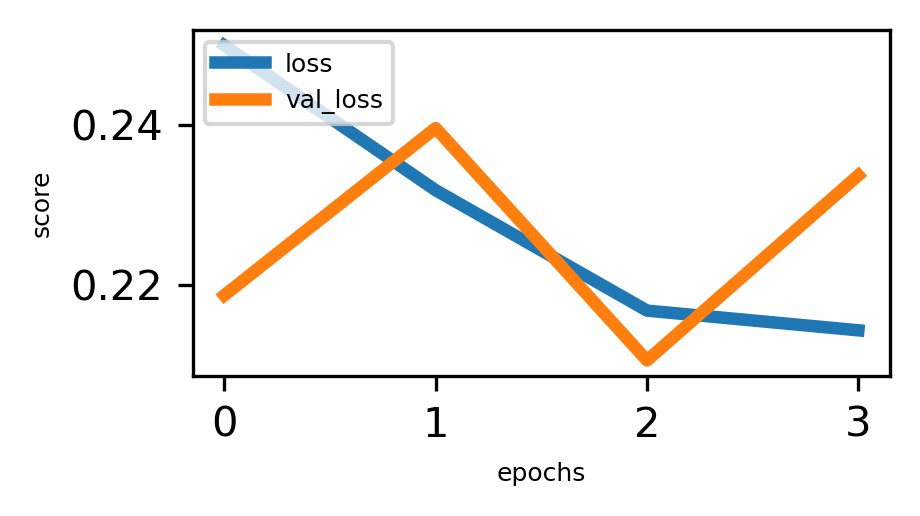

In [34]:
plot_histories(a_e.history, ('loss', 'val_loss'))

313/313 [==============================] - 6s 18ms/step


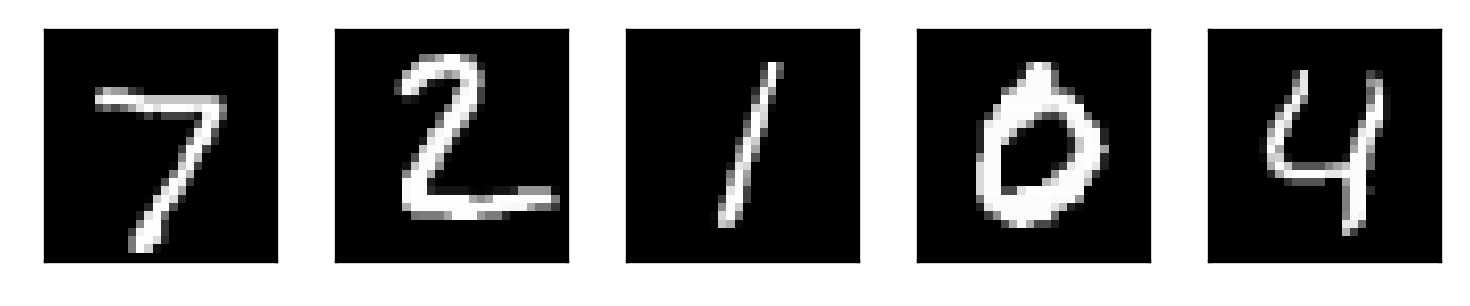

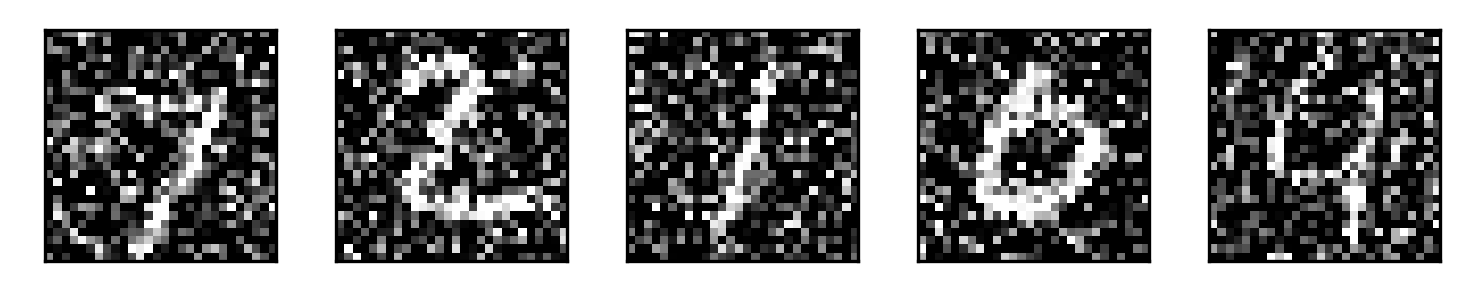

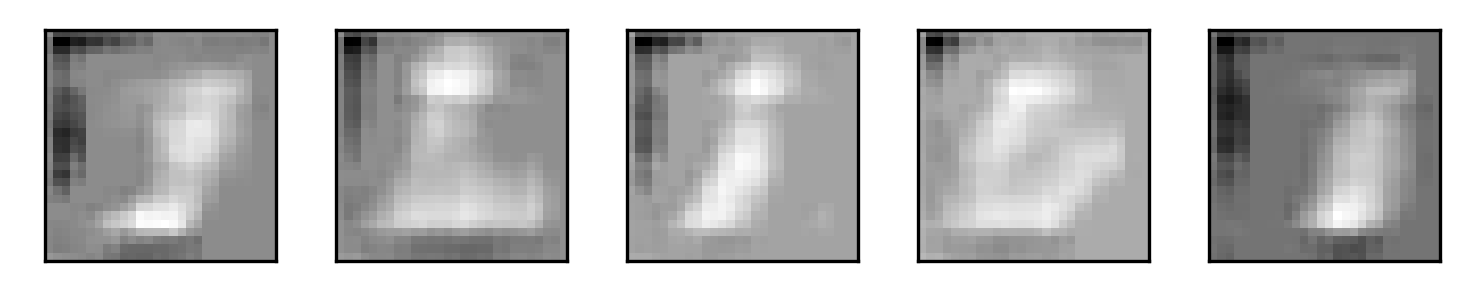

In [35]:
# to predict the reconstructed images for the original images...
pred = autoencoder.predict(test_X_noisy)

plt.figure(figsize=(5,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(unflatten(test_X[i]), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

plt.figure(figsize=(5,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(unflatten(test_X_noisy[i]), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

# to visualize reconstructed images(output of autoencoder)
plt.figure(figsize=(5,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(unflatten(pred[i]), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

*Check better results on [the original page](https://keras.io/examples/vision/autoencoder/)*.

## 5. Generative Adversarial Neural Networks (pix2pix)

Follow the links above to go to the pix2pix gCollab notebook from tensorflow team:
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/pix2pix"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/pix2pix.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />pix2pix gColab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/pix2pix.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />pix2pix GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/pix2pix.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download pix2pix</a>
  </td>
</table>
</br>

Check the article on [ArXiv:1611.07004](https://click.endnote.com/viewer?doi=arxiv%3A1611.07004&token=WzMxMDY4NjcsImFyeGl2OjE2MTEuMDcwMDQiXQ.3nqHSEuMgHTrfoeMMT0LpfRBvmY)

### 5.1 [EXERCISE] Apply the pix2pix algorithm to a certain set of pair images. $\rightarrow$ use the `maps` dataset!!

Save and download the gColab you worked on and upload it to Attenea.

## 6. Autoencoder for dimension reduction (unsupervised training)

Code based on [this example on *Towards data science*](https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html).

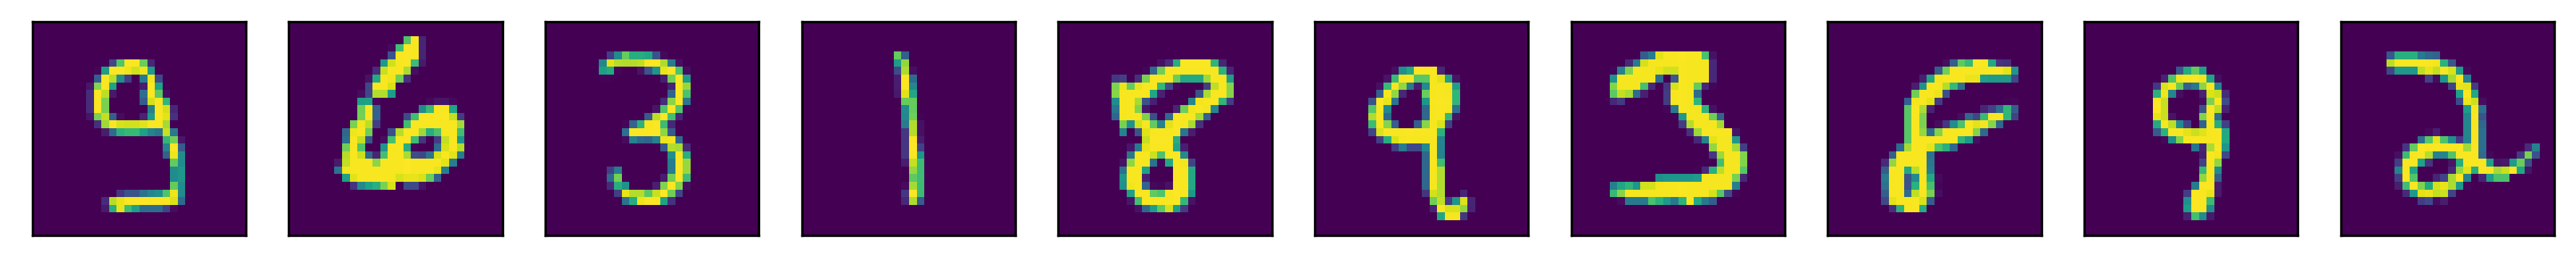

In [36]:
# Load the MNIST data set
tr_imgs, vl_imgs, te_imgs = load_data()

x_train = tr_imgs[0]
x_val = vl_imgs[0]
x_test = te_imgs[0]
y_test = te_imgs[1]

# Take a look at the dataset
n_samples = 10
idx = random.sample(range(x_train.shape[0]), n_samples)
plt.figure(figsize=(15,4))
for i in range(n_samples):
    plt.subplot(1, n_samples, i+1)
    plt.imshow(x_train[idx[i]].squeeze());
    plt.xticks([], [])
    plt.yticks([], [])

In [37]:
# This is the dimension of the latent space (encoding space)
latent_dim = 2

# Images are 28 by 28
img_shape = (x_train.shape[1], x_train.shape[2])

encoder = Sequential([
    Flatten(input_shape=img_shape),
    Dense(192, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(latent_dim, name='encoder_output')
])

decoder = Sequential([
    Dense(64, activation='sigmoid', input_shape=(latent_dim,)),
    Dense(128, activation='sigmoid'),
    Dense(img_shape[0] * img_shape[1], activation='relu'),
    Reshape(img_shape)
])

In [38]:
class TestEncoder(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test):
        super(TestEncoder, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.current_epoch = 0

    def on_epoch_begin(self, epoch, logs={}):
        clear_output()
        self.current_epoch = self.current_epoch + 1
        encoder_model = Model(inputs=self.model.input,
                              outputs=self.model.get_layer('encoder_output').output)
        encoder_output = encoder_model(self.x_test)
        plt.subplot(4, 3, self.current_epoch)
        plt.scatter(encoder_output[:, 0],
                    encoder_output[:, 1], s=20, alpha=0.8,
                    cmap='Set1', c=self.y_test[0:x_test.shape[0]])
        plt.xlim(-9, 9)
        plt.ylim(-9, 9)
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')
        plt.title(f"epoch: {epoch}")
        plt.show()

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
autoencoder.summary()
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1_input (InputLayer  [(None, 28, 28)]         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 192)               150720    
                                                                 
 dense_4 (Dense)             (None, 64)                12352     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 encoder_output (Dense)      (None, 2)                 66        
                                                           

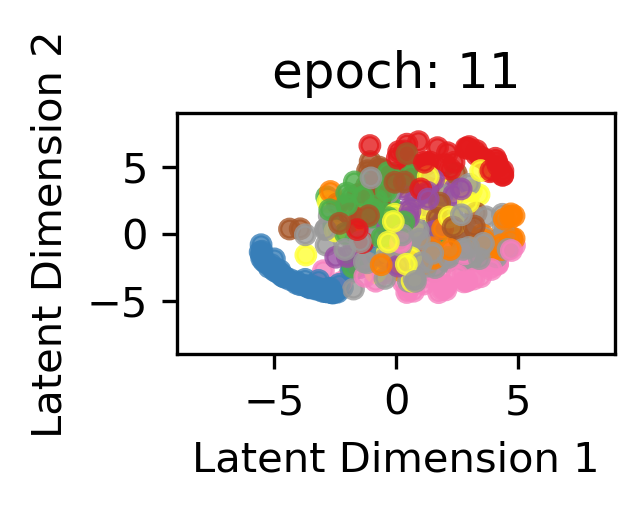

In [40]:
# plt.figure(figsize=(15,15))
model_history = autoencoder.fit(x_train, x_train, epochs=12, batch_size=32,
                                verbose=0,
                                callbacks=[TestEncoder(x_test[0:500], 
                                                       y_test[0:500])])


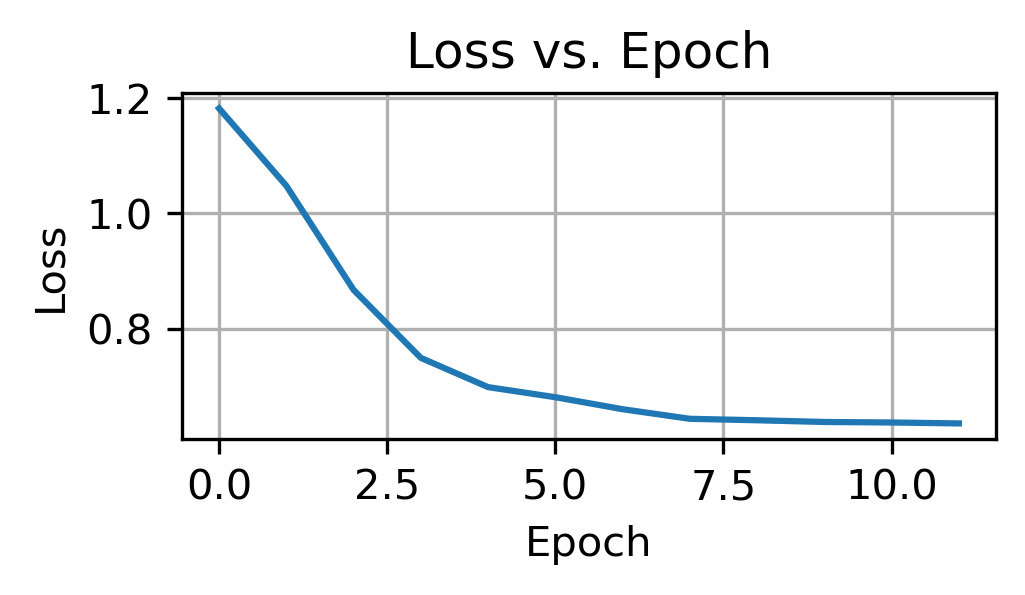

In [41]:
plt.figure(figsize=(3.5,1.5))
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

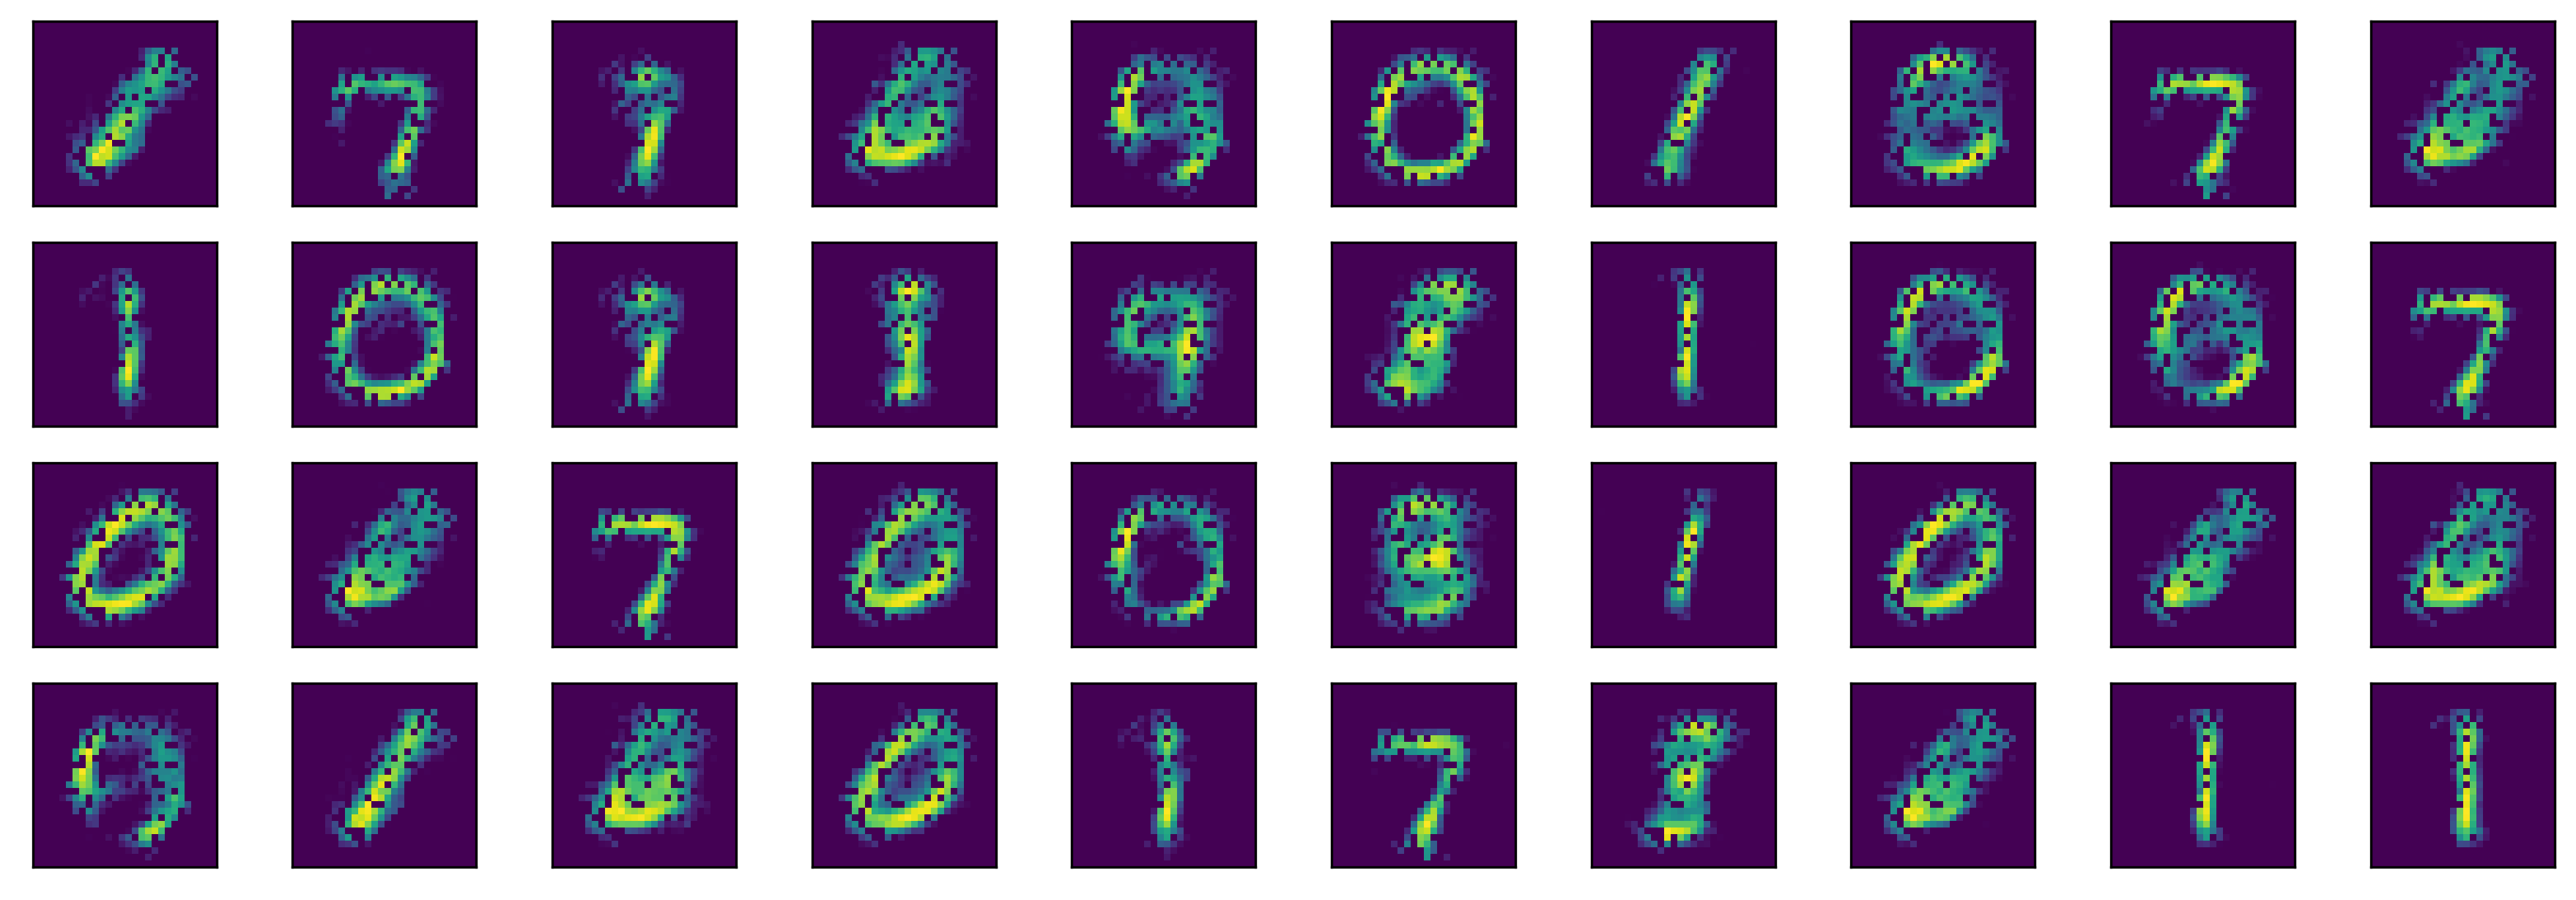

In [42]:
n_samples = 40
fake_sample = np.random.uniform(low=-8, high=8, size=(n_samples, 2))
plt.figure(figsize=(15,5))
for i in range(n_samples):
    plt.subplot(4, n_samples//4, i+1)
    fake_encoding = np.array([fake_sample[i]])
    fake_digit = decoder(fake_encoding).numpy().squeeze() 
    plt.imshow(fake_digit);
    plt.xticks([], [])
    plt.yticks([], [])

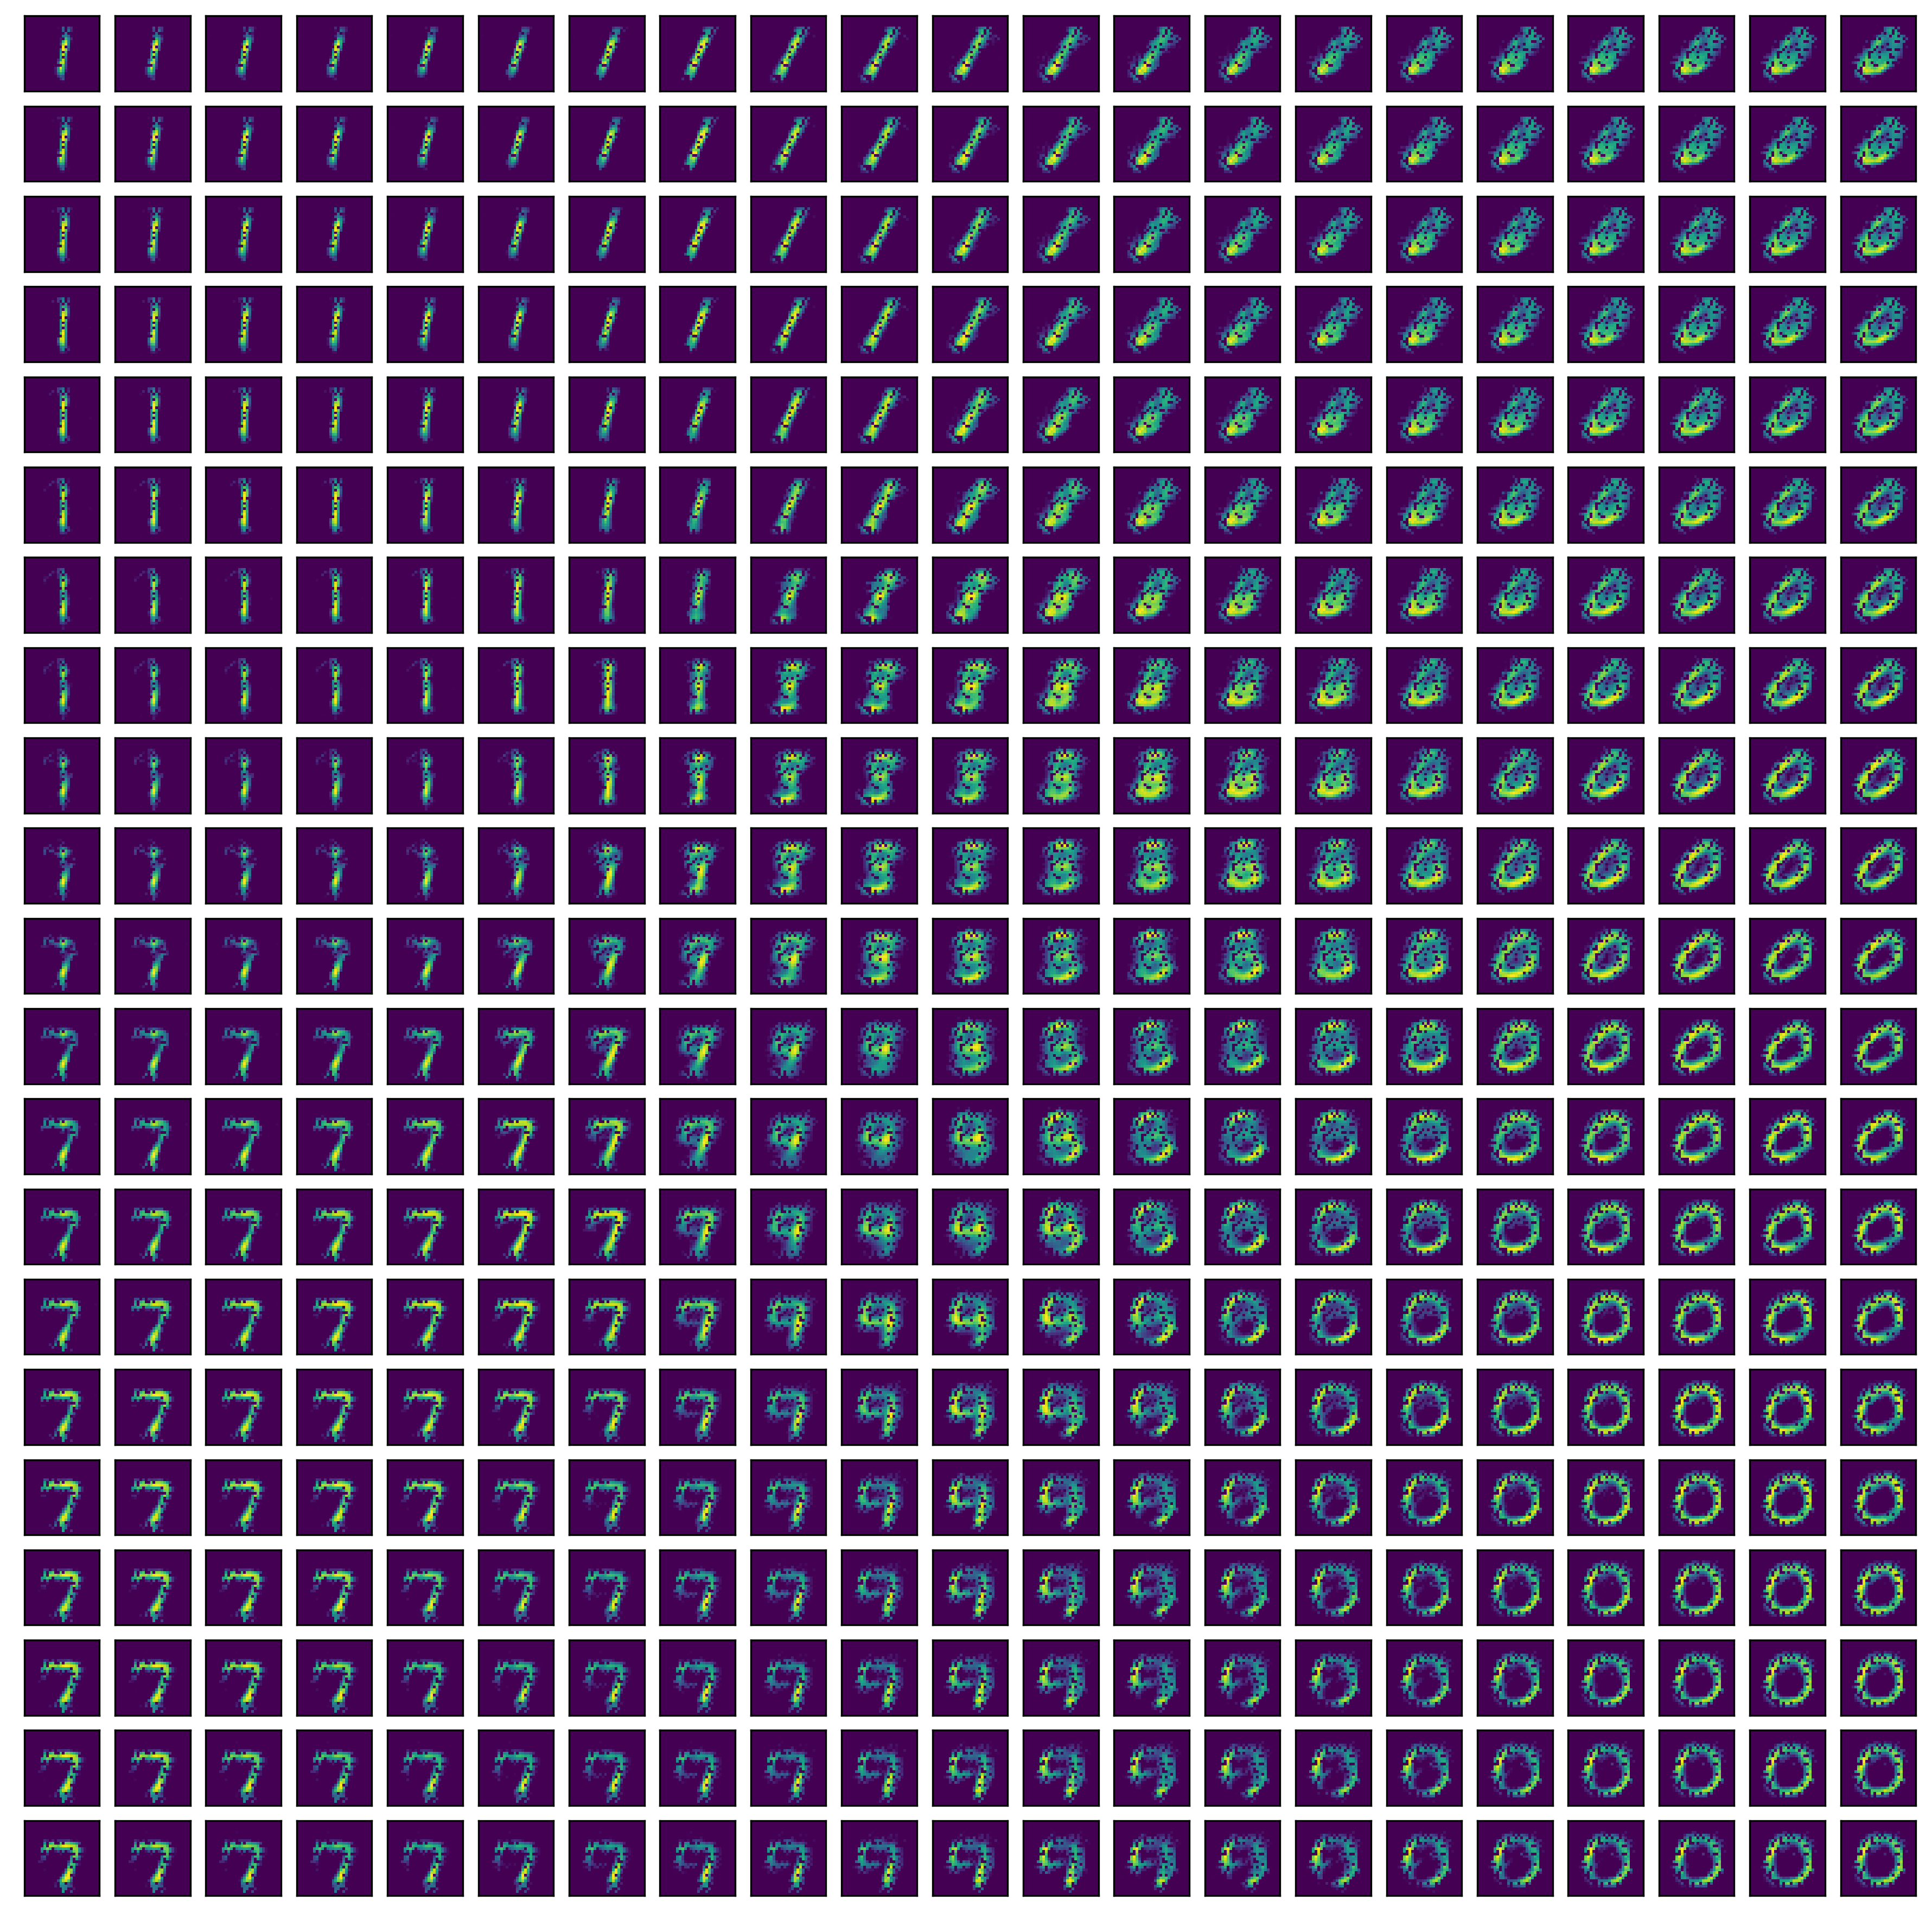

In [43]:
Nplot = 21
plt.figure(figsize=(15,15))
idx = 0
for ix in np.linspace(-9, 9, Nplot):
    for iy in np.linspace(-9, 9, Nplot):
        idx += 1
        plt.subplot(Nplot, Nplot, idx)
        fake_encoding = np.expand_dims(np.array([ix, iy]), 0)
        fake_digit = decoder(fake_encoding).numpy().squeeze() 
        plt.imshow(fake_digit);
        plt.xticks([], [])
        plt.yticks([], [])

## 7. Autoencoders for random face generator

Go to [`random_face_generator.ipynb` notebook](https://github.com/dhanushkamath/VariationalAutoencoder/blob/master/Variational_Autoencoder.ipynb).

Play with https://generated.photos/face-generator/new

## 8. Timeseries anomaly detection using an Autoencoder

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

**Author:** [pavithrasv](https://github.com/pavithrasv)<br>
**Date created:** 2020/05/31<br>
**Last modified:** 2020/05/31<br>

This script demonstrates how you can use a reconstruction convolutional autoencoder model to detect anomalies in timeseries data.

### 8.1 Load the data

We will use the [Numenta Anomaly Benchmark(NAB)](
https://www.kaggle.com/boltzmannbrain/nab) dataset. It provides artifical
timeseries data containing labeled anomalous periods of behavior. Data are
ordered, timestamped, single-valued metrics.

We will use the `art_daily_small_noise.csv` file for training and the
`art_daily_jumpsup.csv` file for testing. The simplicity of this dataset
allows us to demonstrate anomaly detection effectively.

In [44]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

Quick look at the data. Check *Pandas* documentation: https://www.geeksforgeeks.org/python-pandas-dataframe.

In [45]:
print(type(df_small_noise))
print(df_small_noise)
print(df_daily_jumpsup)

<class 'pandas.core.frame.DataFrame'>
                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
...                        ...
2014-04-14 23:35:00  20.211195
2014-04-14 23:40:00  20.531041
2014-04-14 23:45:00  19.032127
2014-04-14 23:50:00  21.798801
2014-04-14 23:55:00  18.682620

[4032 rows x 1 columns]
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739
...                        ...
2014-04-14 23:35:00  18.074649
2014-04-14 23:40:00  21.002014
2014-04-14 23:45:00  20.566713
2014-04-14 23:50:00  18.254193
2014-04-14 23:55:00  21.863147

[4032 rows x 1 columns]


Let's visualize the data

#### 8.1.1 Timeseries data without anomalies

We will use the following data for training.

<class 'pandas.core.frame.DataFrame'>


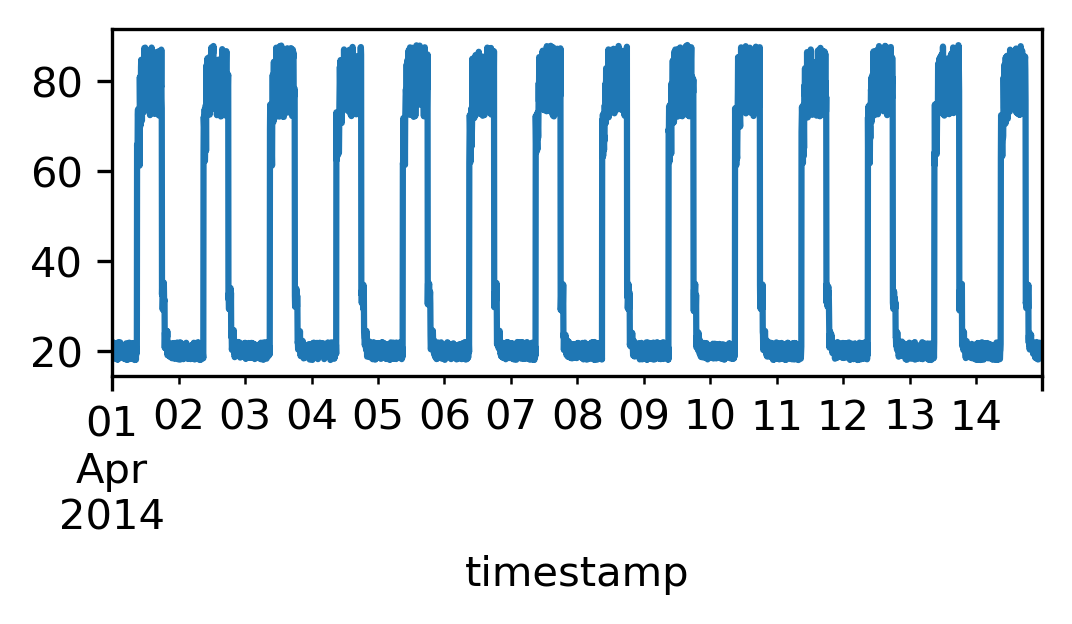

In [46]:
print(type(df_small_noise))
fig, ax = plt.subplots(figsize=(4, 1.5))
df_small_noise.plot(legend=False, ax=ax)
plt.show()

#### 8.1.2 Timeseries data with anomalies

We will use the following data for testing and see if the sudden jump up in the
data is detected as an anomaly.

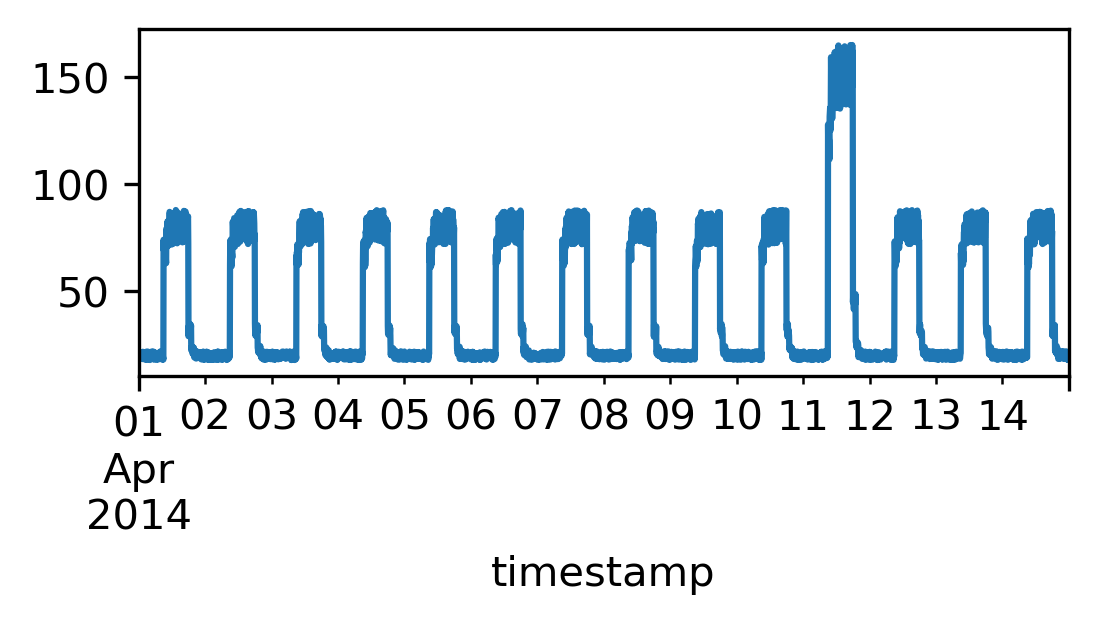

In [47]:
fig, ax = plt.subplots(figsize=(4, 1.5))
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

### 8.2 Prepare training data

Get data values from the training timeseries data file and normalize the
`value` data. We have a `value` for every 5 mins for 14 days.

-   24 * 60 / 5 = **288 timesteps per day**
-   288 * 14 = **4032 data points** in total

Number of training samples: 4032


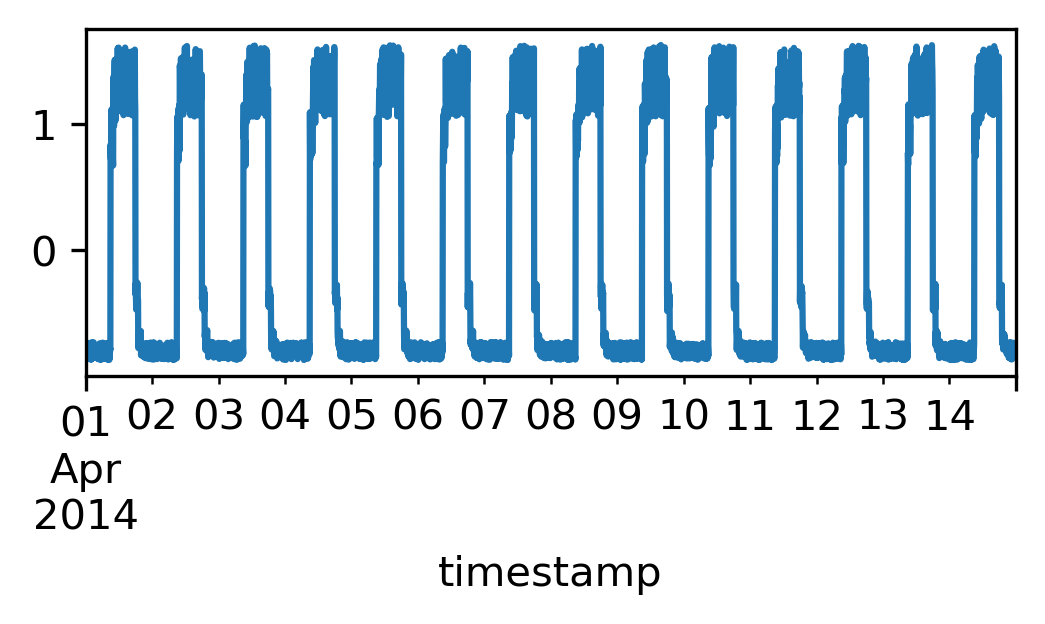

In [48]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
fig, ax = plt.subplots(figsize=(4, 1.5))
df_training_value.plot(legend=False, ax=ax)
print("Number of training samples:", len(df_training_value))

Create sequences combining `TIME_STEPS` contiguous data values from the
training data.

In [49]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


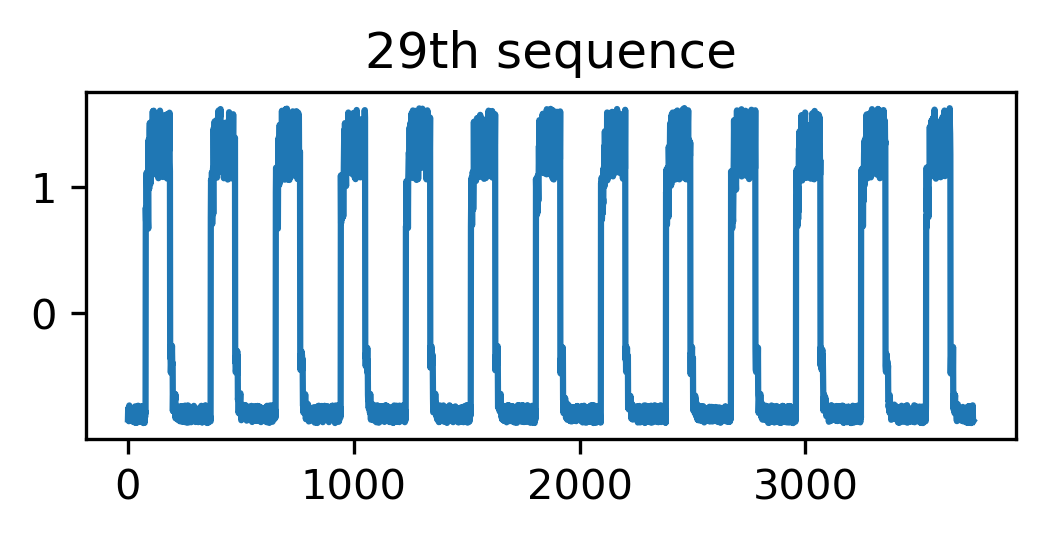

In [51]:
# NEW CODE TO SHOW WHAT A SEQUENCE IS
for i in range(30):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(4, 1.5))
    plt.plot(x_train[:,i])
    plt.title(f"{i}th sequence")
    plt.show()

### 8.3 Build a model

We will build a convolutional reconstruction autoencoder model. The model will
take input of shape `(batch_size, sequence_length, num_features)` and return
output of the same shape. In this case, `sequence_length` is 288 and
`num_features` is 1.

In [52]:
layers = tf.keras.layers

model = tf.keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                            

### 8.4 Train the model

Please note that we are using `x_train` as both the input and the target
since this is a reconstruction model.

In [53]:
history = model.fit(
    x_train,
    x_train,  # y_train means ground truth
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/30
27/27 [==============================] - 5s 116ms/step - loss: 0.4573 - val_loss: 0.0946
Epoch 2/30
27/27 [==============================] - 3s 93ms/step - loss: 0.0733 - val_loss: 0.0381
Epoch 3/30
27/27 [==============================] - 3s 101ms/step - loss: 0.0535 - val_loss: 0.0348
Epoch 4/30
27/27 [==============================] - 3s 102ms/step - loss: 0.0460 - val_loss: 0.0342
Epoch 5/30
27/27 [==============================] - 3s 104ms/step - loss: 0.0414 - val_loss: 0.0317
Epoch 6/30
27/27 [==============================] - 2s 88ms/step - loss: 0.0375 - val_loss: 0.0298
Epoch 7/30
27/27 [==============================] - 2s 86ms/step - loss: 0.0342 - val_loss: 0.0282
Epoch 8/30
27/27 [==============================] - 2s 86ms/step - loss: 0.0311 - val_loss: 0.0284
Epoch 9/30
27/27 [==============================] - 2s 86ms/step - loss: 0.0289 - val_loss: 0.0271
Epoch 10/30
27/27 [==============================] - 2s 85ms/step - loss: 0.0271 - val_loss: 0.0285
Epoch

Let's plot training and validation loss to see how the training went.

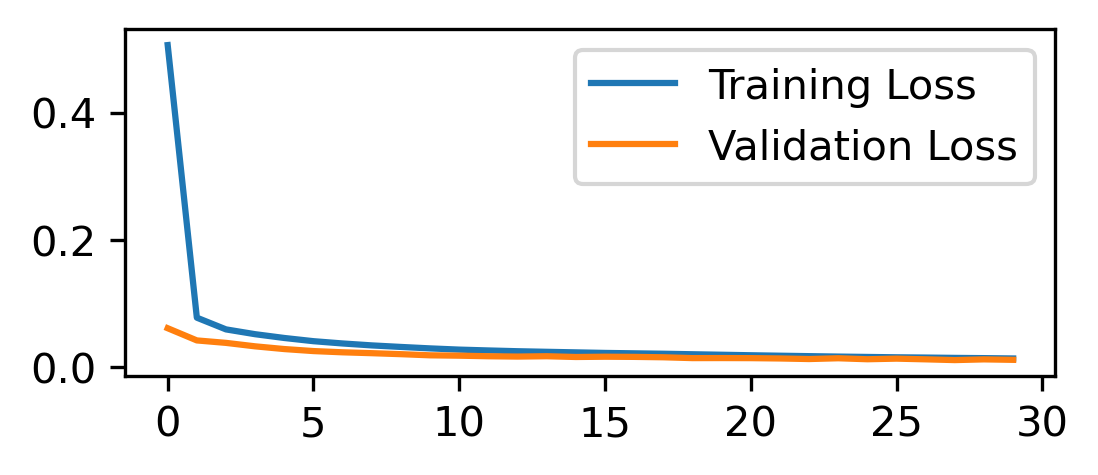

In [66]:
fig, ax = plt.subplots(figsize=(4, 1.5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

### 8.5 Detecting anomalies

We will detect anomalies by determining how well our model can reconstruct
the input data.


1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.

118/118 [==============================] - 1s 4ms/step


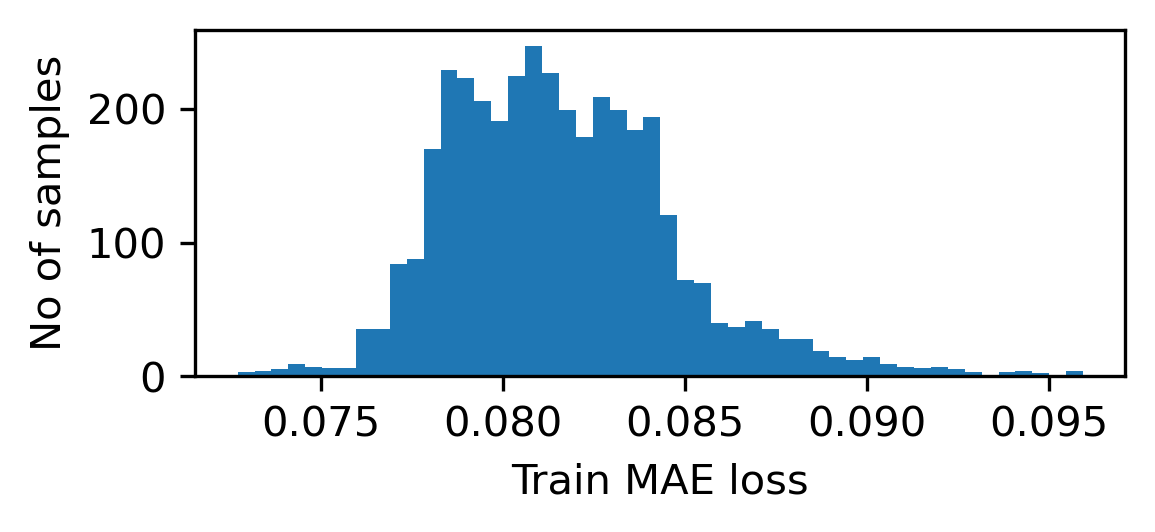

Reconstruction error threshold:  0.09594259984433869


In [67]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

fig, ax = plt.subplots(figsize=(4, 1.5))
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

#### 8.5.1 Compare recontruction

Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.

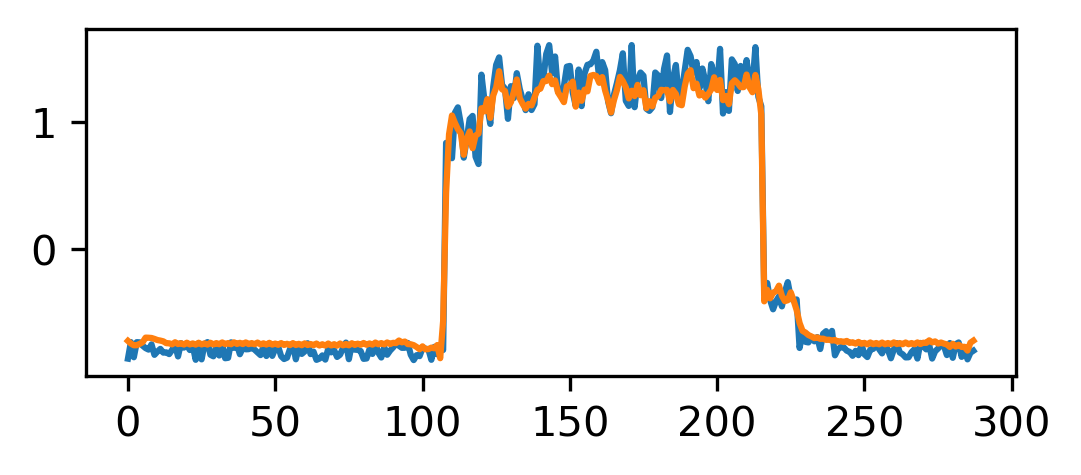

In [68]:
# Checking how the first sequence is learnt
fig, ax = plt.subplots(figsize=(4, 1.5))
plt.plot(x_train[0], label='training set')
plt.plot(x_train_pred[0], label='')
plt.show()

#### 8.5.2 Prepare test data

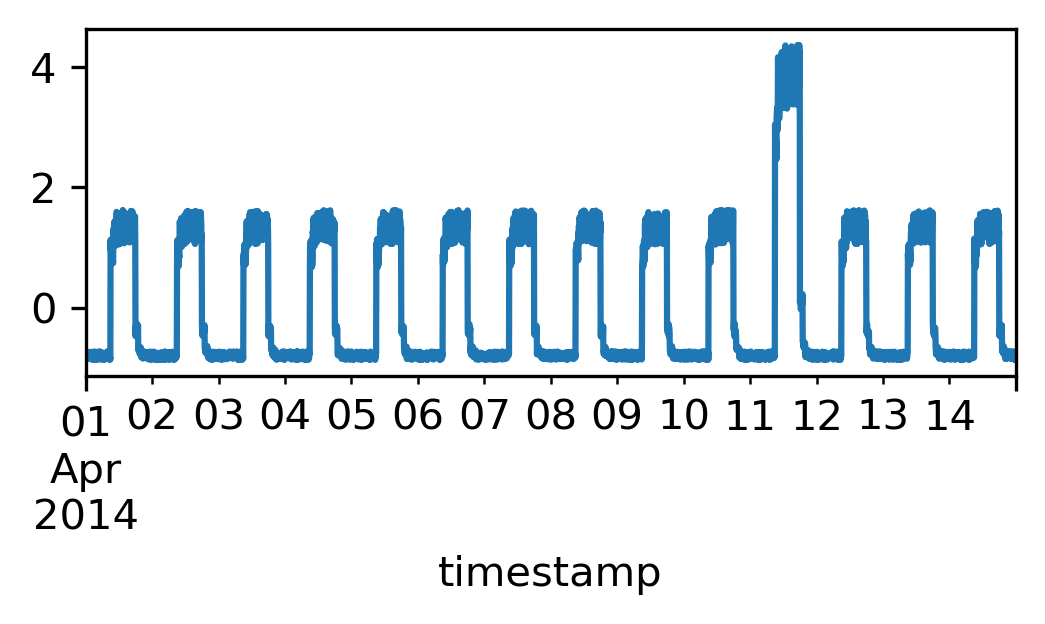

Test input shape:  (3745, 288, 1)
118/118 [==============================] - 0s 4ms/step


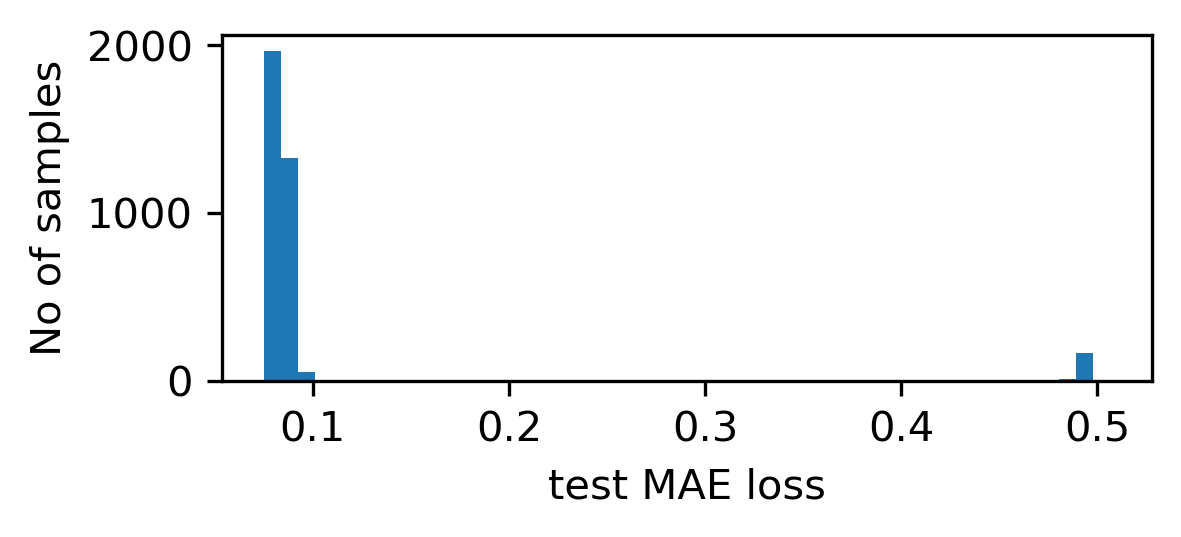

Number of anomaly samples:  411
Indices of anomaly samples:  (array([ 217,  790,  793,  794, 1369, 1654, 1657, 1658, 1659, 1661, 2521,
       2522, 2523, 2525, 2697, 2701, 2702, 2703, 2704, 2705, 2706, 2707,
       2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718,
       2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729,
       2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740,
       2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751,
       2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762,
       2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773,
       2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784,
       2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795,
       2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806,
       2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817,
       2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2

In [69]:

df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots(figsize=(4, 1.5))
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

fig, ax = plt.subplots(figsize=(4, 1.5))
plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

### 8.6 Plot anomalies

We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:

- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9

All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.

In [70]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Let's overlay the anomalies on the original test data plot.

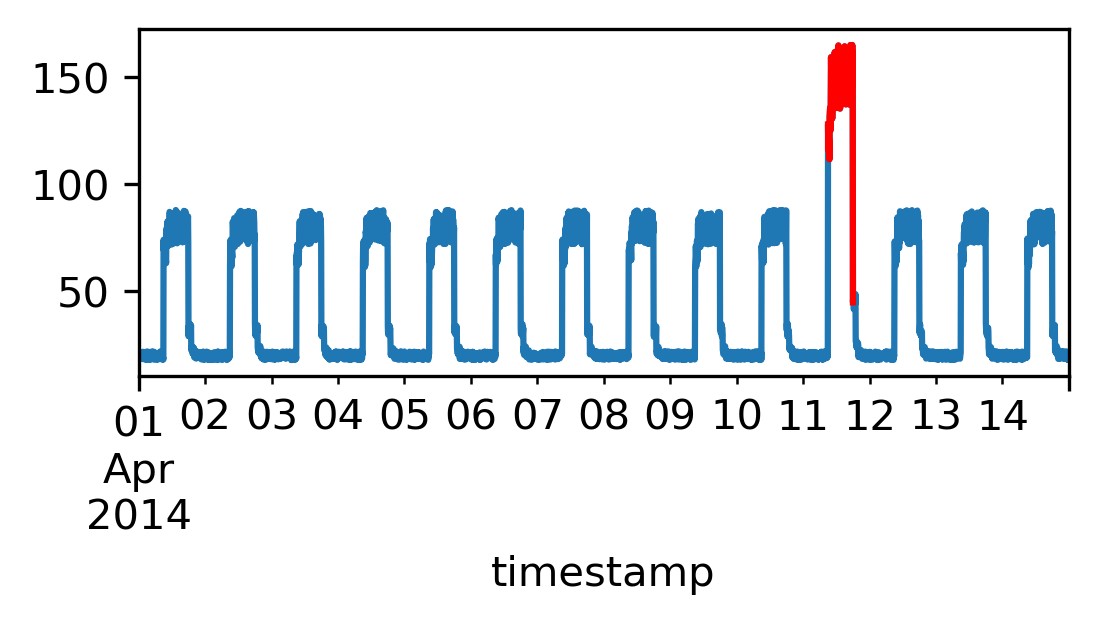

In [71]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots(figsize=(4, 1.5))
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()